# 1. Problem Statement

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)

2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)

1. Data Collection
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, 
More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, 
skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have 
limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, 
source, destination, route, departure time, arrival time, duration, total stops and the target variable 
price. You can make changes to it, you can add or you can remove some columns, it completely
depends on the website from which you are fetching the data.
2. Data Analysis
After cleaning the data, you have to do some analysis on the data. 
Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
morning flights expensive?
3. Model Building
After collecting the data, you need to build a machine learning model. Before model building do 
all data pre-processing steps. Try different models with different hyper parameters and select 
the bestmodel.
Follow the complete life cycle of data science. Include all the steps like
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3. Import Dataset

In [2]:
data_Oct=pd.read_csv("Airline_Oct.csv")
data_nov=pd.read_csv("Airline_Nov.csv")
data_dec=pd.read_csv("Airline_Dec.csv")
data_jan=pd.read_csv("Airline_Jan.csv")
data_feb_mar=pd.read_csv("Airline_Feb_Mar.csv")

In [3]:
data=pd.concat([data_Oct,data_nov,data_dec,data_jan,data_feb_mar])
data.to_csv('Airline_data.csv',index=False)

# 4.Basic Analysis of Dataset

In [4]:
data

,Airline_Name,Departure_Time,Departure_City,Journey_Hour,Stop_Details,Arrival_Time,Destination_City,Price,Deaprture_Date
0,AirAsia,11:40,Mumbai,07 h 15 m,1 stop via New Delhi,18:55,Bengaluru,"₹ 5,100",26/10/2021
1,Go First,06:05,Mumbai,01 h 40 m,Non stop,07:45,Bengaluru,"₹ 5,102",26/10/2021
2,Go First,18:05,Mumbai,01 h 40 m,Non stop,19:45,Bengaluru,"₹ 5,102",26/10/2021
3,Go First,22:15,Mumbai,01 h 50 m,Non stop,00:05,Bengaluru,+ 1 DAY,26/10/2021
4,Go First,09:50,Mumbai,03 h 35 m,1 stop via Goa,13:25,Bengaluru,"₹ 5,102",26/10/2021
...,...,...,...,...,...,...,...,...,...
23374,IndiGo,17:40,New Delhi,02 h 20 m,Non stop,20:00,Hyderabad,"₹ 3,750",31/03/2022
23375,Spicejet,06:10,New Delhi,14 h,1 stop via Chennai,20:10,Hyderabad,"₹ 3,752",31/03/2022
23376,Vistara,07:05,New Delhi,02 h 20 m,Non stop,09:25,Hyderabad,"₹ 6,376",31/03/2022
23377,Vistara,14:45,New Delhi,02 h 15 m,Non stop,17:00,Hyderabad,"₹ 6,376",31/03/2022


In [5]:
data.reset_index(inplace=True,drop=True)

In [6]:
data.head()

,Airline_Name,Departure_Time,Departure_City,Journey_Hour,Stop_Details,Arrival_Time,Destination_City,Price,Deaprture_Date
0,AirAsia,11:40,Mumbai,07 h 15 m,1 stop via New Delhi,18:55,Bengaluru,"₹ 5,100",26/10/2021
1,Go First,06:05,Mumbai,01 h 40 m,Non stop,07:45,Bengaluru,"₹ 5,102",26/10/2021
2,Go First,18:05,Mumbai,01 h 40 m,Non stop,19:45,Bengaluru,"₹ 5,102",26/10/2021
3,Go First,22:15,Mumbai,01 h 50 m,Non stop,00:05,Bengaluru,+ 1 DAY,26/10/2021
4,Go First,09:50,Mumbai,03 h 35 m,1 stop via Goa,13:25,Bengaluru,"₹ 5,102",26/10/2021


In [7]:
print("Shape of the Dataset:",data.shape)
print("Total Rows in Dataset:",data.shape[0])
print("Total Columns in Dataset:",data.shape[1])


Shape of the Dataset: (83273, 9)
Total Rows in Dataset: 83273
Total Columns in Dataset: 9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83273 entries, 0 to 83272
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline_Name      83273 non-null  object
 1   Departure_Time    83273 non-null  object
 2   Departure_City    83273 non-null  object
 3   Journey_Hour      83273 non-null  object
 4   Stop_Details      83273 non-null  object
 5   Arrival_Time      83273 non-null  object
 6   Destination_City  83273 non-null  object
 7   Price             83273 non-null  object
 8   Deaprture_Date    83273 non-null  object
dtypes: object(9)
memory usage: 5.7+ MB


**Observation.**
- There are 9 columns where all columns data type is object type.

In [11]:
data.nunique()

Airline_Name          27
Departure_Time       261
Departure_City         4
Journey_Hour         222
Stop_Details         117
Arrival_Time         272
Destination_City       6
Price               2390
Deaprture_Date       157
dtype: int64

In [12]:
data.describe(include="object")

,Airline_Name,Departure_Time,Departure_City,Journey_Hour,Stop_Details,Arrival_Time,Destination_City,Price,Deaprture_Date
count,83273,83273,83273,83273,83273,83273,83273,83273,83273
unique,27,261,4,222,117,272,6,2390,157
top,IndiGo,07:00,New Delhi,02 h 15 m,Non stop,22:45,New Delhi,+ 1 DAY,14/11/2021
freq,35490,2108,26181,10192,63975,1155,20966,8929,922


# 5. Checking null value in dataset

In [13]:
data.isnull().sum()

Airline_Name        0
Departure_Time      0
Departure_City      0
Journey_Hour        0
Stop_Details        0
Arrival_Time        0
Destination_City    0
Price               0
Deaprture_Date      0
dtype: int64

**There are no null value in the dataset**

# 6. Feature Engineering

In [14]:
data.columns

Index(['Airline_Name', 'Departure_Time', 'Departure_City', 'Journey_Hour',
       'Stop_Details', 'Arrival_Time', 'Destination_City', 'Price',
       'Deaprture_Date'],
      dtype='object')

In [15]:
indexes=data[data["Price"]=="+ 1 DAY"].index

In [16]:
data.drop(indexes,inplace=True)

In [17]:
data

,Airline_Name,Departure_Time,Departure_City,Journey_Hour,Stop_Details,Arrival_Time,Destination_City,Price,Deaprture_Date
0,AirAsia,11:40,Mumbai,07 h 15 m,1 stop via New Delhi,18:55,Bengaluru,"₹ 5,100",26/10/2021
1,Go First,06:05,Mumbai,01 h 40 m,Non stop,07:45,Bengaluru,"₹ 5,102",26/10/2021
2,Go First,18:05,Mumbai,01 h 40 m,Non stop,19:45,Bengaluru,"₹ 5,102",26/10/2021
4,Go First,09:50,Mumbai,03 h 35 m,1 stop via Goa,13:25,Bengaluru,"₹ 5,102",26/10/2021
5,IndiGo,05:10,Mumbai,01 h 35 m,Non stop,06:45,Bengaluru,"₹ 5,103",26/10/2021
...,...,...,...,...,...,...,...,...,...
83268,IndiGo,17:40,New Delhi,02 h 20 m,Non stop,20:00,Hyderabad,"₹ 3,750",31/03/2022
83269,Spicejet,06:10,New Delhi,14 h,1 stop via Chennai,20:10,Hyderabad,"₹ 3,752",31/03/2022
83270,Vistara,07:05,New Delhi,02 h 20 m,Non stop,09:25,Hyderabad,"₹ 6,376",31/03/2022
83271,Vistara,14:45,New Delhi,02 h 15 m,Non stop,17:00,Hyderabad,"₹ 6,376",31/03/2022


In [18]:
data.reset_index(inplace=True,drop=True)

In [19]:
data

,Airline_Name,Departure_Time,Departure_City,Journey_Hour,Stop_Details,Arrival_Time,Destination_City,Price,Deaprture_Date
0,AirAsia,11:40,Mumbai,07 h 15 m,1 stop via New Delhi,18:55,Bengaluru,"₹ 5,100",26/10/2021
1,Go First,06:05,Mumbai,01 h 40 m,Non stop,07:45,Bengaluru,"₹ 5,102",26/10/2021
2,Go First,18:05,Mumbai,01 h 40 m,Non stop,19:45,Bengaluru,"₹ 5,102",26/10/2021
3,Go First,09:50,Mumbai,03 h 35 m,1 stop via Goa,13:25,Bengaluru,"₹ 5,102",26/10/2021
4,IndiGo,05:10,Mumbai,01 h 35 m,Non stop,06:45,Bengaluru,"₹ 5,103",26/10/2021
...,...,...,...,...,...,...,...,...,...
74339,IndiGo,17:40,New Delhi,02 h 20 m,Non stop,20:00,Hyderabad,"₹ 3,750",31/03/2022
74340,Spicejet,06:10,New Delhi,14 h,1 stop via Chennai,20:10,Hyderabad,"₹ 3,752",31/03/2022
74341,Vistara,07:05,New Delhi,02 h 20 m,Non stop,09:25,Hyderabad,"₹ 6,376",31/03/2022
74342,Vistara,14:45,New Delhi,02 h 15 m,Non stop,17:00,Hyderabad,"₹ 6,376",31/03/2022


## 6.1 Dealing with Airline Name

In [20]:
data["Airline_Name"].value_counts()

IndiGo                 31646
Go First               10235
Vistara                 9834
Air India               9600
AirAsia                 6689
Spicejet                6032
TruJet                    84
Star Air                  69
AirAsia, IndiGo           24
IndiGo, AirAsia           24
Air India, IndiGo         22
IndiGo, Go First          16
Vistara, AirAsia          14
AirAsia, Air India        11
Go First, IndiGo           8
Air India, AirAsia         7
IndiGo, Air India          7
Vistara, IndiGo            6
Spicejet, AirAsia          4
IndiGo, Vistara            4
IndiGo, Spicejet           2
Spicejet, Air India        2
AirAsia, Go First          1
Spicejet, IndiGo           1
Vistara, Air India         1
Go First, Star Air         1
Name: Airline_Name, dtype: int64

In [21]:
inde=data[data["Airline_Name"]=="AirAsia, IndiGo"].index

In [22]:
data.drop(inde,inplace=True)

In [23]:
inde=data[data["Airline_Name"]=="IndiGo, AirAsia"].index

In [24]:
data.drop(inde,inplace=True)

In [25]:
inde=data[data["Airline_Name"]=="Air India, IndiGo"].index

In [26]:
data.drop(inde,inplace=True)

In [27]:
inde=data[data["Airline_Name"]=="IndiGo, Go First"].index

In [28]:
data.drop(inde,inplace=True)

In [29]:
inde=data[data["Airline_Name"]=="Vistara, AirAsia"].index

In [30]:
data.drop(inde,inplace=True)

In [31]:
inde=data[data["Airline_Name"]=="AirAsia, Air India"].index

In [32]:
data.drop(inde,inplace=True)

In [33]:
inde=data[data["Airline_Name"]=="Go First, IndiGo"].index

In [34]:
data.drop(inde,inplace=True)

In [35]:
inde=data[data["Airline_Name"]=="IndiGo, Air India"].index

In [36]:
data.drop(inde,inplace=True)

In [37]:
inde=data[data["Airline_Name"]=="Vistara, AirAsia"].index

In [38]:
data.drop(inde,inplace=True)

In [39]:
inde=data[data["Airline_Name"]=="AirAsia, Air India"].index

In [40]:
data.drop(inde,inplace=True)

In [41]:
inde=data[data["Airline_Name"]=="Go First, IndiGo"].index

In [42]:
data.drop(inde,inplace=True)

In [43]:
inde=data[data["Airline_Name"]=="IndiGo, Air India"].index

In [44]:
data.drop(inde,inplace=True)

In [45]:
inde=data[data["Airline_Name"]=="Air India, AirAsia"].index

In [46]:
data.drop(inde,inplace=True)

In [47]:
inde=data[data["Airline_Name"]=="Vistara, IndiGo"].index

In [48]:
data.drop(inde,inplace=True)

In [49]:
inde=data[data["Airline_Name"]=="Spicejet, AirAsia"].index

In [50]:
data.drop(inde,inplace=True)

In [51]:
inde=data[data["Airline_Name"]=="IndiGo, Vistara"].index

In [52]:
data.drop(inde,inplace=True)

In [53]:
inde=data[data["Airline_Name"]=="IndiGo, Spicejet"].index

In [54]:
data.drop(inde,inplace=True)

In [55]:
inde=data[data["Airline_Name"]=="Spicejet, Air India"].index

In [56]:
data.drop(inde,inplace=True)

In [57]:
inde=data[data["Airline_Name"]=="Go First, Star Air"].index

In [58]:
data.drop(inde,inplace=True)

In [59]:
inde=data[data["Airline_Name"]=="Spicejet, IndiGo"].index

In [60]:
data.drop(inde,inplace=True)

In [61]:
inde=data[data["Airline_Name"]=="Vistara, Air India"].index

In [62]:
data.drop(inde,inplace=True)

In [63]:
inde=data[data["Airline_Name"]=="AirAsia, Go First"].index

In [64]:
data.drop(inde,inplace=True)

In [65]:
data["Airline_Name"].value_counts()

IndiGo       31646
Go First     10235
Vistara       9834
Air India     9600
AirAsia       6689
Spicejet      6032
TruJet          84
Star Air        69
Name: Airline_Name, dtype: int64

In [66]:
data.reset_index(inplace=True,drop=True)

## 6.2 Dealing with Price

In [67]:
price=[]
for i in data["Price"]:
    str=(i[1:])
    z=str.replace(",","")
    price.append(z)

In [68]:
data["Price"]=price

In [69]:
data["Price"]=data["Price"].astype(float)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74189 entries, 0 to 74188
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline_Name      74189 non-null  object 
 1   Departure_Time    74189 non-null  object 
 2   Departure_City    74189 non-null  object 
 3   Journey_Hour      74189 non-null  object 
 4   Stop_Details      74189 non-null  object 
 5   Arrival_Time      74189 non-null  object 
 6   Destination_City  74189 non-null  object 
 7   Price             74189 non-null  float64
 8   Deaprture_Date    74189 non-null  object 
dtypes: float64(1), object(8)
memory usage: 5.1+ MB


## 6.3 Departure Date & Time Coumns

In [71]:
data["Deaprture_Date"].value_counts()

21/11/2021    829
14/11/2021    817
13/11/2021    813
09/11/2021    763
22/11/2021    722
             ... 
28/03/2022    315
13/02/2022    315
29/03/2022    308
30/03/2022    306
31/03/2022    301
Name: Deaprture_Date, Length: 157, dtype: int64

In [72]:
data["Departure_Time"].value_counts()

07:00    2104
06:05    1676
08:00    1529
06:00    1326
18:00    1040
         ... 
02:15       5
02:45       4
02:10       3
12:35       3
01:40       2
Name: Departure_Time, Length: 240, dtype: int64

In [73]:
data["departure_datetime"]=data["Deaprture_Date"]+" "+data["Departure_Time"]

In [74]:
import time
import datetime
  

In [75]:
departure_dt=[]
for i in data["departure_datetime"]:
    x=pd.to_datetime(i,format="%d/%m/%Y %H:%M",errors="coerce")
    departure_dt.append(x)
    



In [76]:
data["departure_dt"]=departure_dt

In [77]:
data["departure_year"]=data["departure_dt"].dt.year
data["departure_month"]=data["departure_dt"].dt.month
data["departure_day"]=data["departure_dt"].dt.day
data["departure_day_name"]=data["departure_dt"].dt.strftime("%A")
data["departure_hour"]=data["departure_dt"].dt.hour
data["departure_minute"]=data["departure_dt"].dt.minute

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74189 entries, 0 to 74188
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Airline_Name        74189 non-null  object        
 1   Departure_Time      74189 non-null  object        
 2   Departure_City      74189 non-null  object        
 3   Journey_Hour        74189 non-null  object        
 4   Stop_Details        74189 non-null  object        
 5   Arrival_Time        74189 non-null  object        
 6   Destination_City    74189 non-null  object        
 7   Price               74189 non-null  float64       
 8   Deaprture_Date      74189 non-null  object        
 9   departure_datetime  74189 non-null  object        
 10  departure_dt        74189 non-null  datetime64[ns]
 11  departure_year      74189 non-null  int64         
 12  departure_month     74189 non-null  int64         
 13  departure_day       74189 non-null  int64     

In [79]:
Departure_timerange=[]
j=0
for i in data["departure_hour"]:
    m=data["departure_minute"][j]
    
    
    if 0 <= i <= 3 and m == 0:    
        Departure_timerange.append("00 to 3 AM")
    else:
        if 0 <= i <= 2 and m !=0:
            Departure_timerange.append("00 to 3 AM")
        
    if 3 < i <= 6 and m==0:        
        Departure_timerange.append("3 to 6 AM")
    else:
        if 3 <= i <= 5 and m !=0:
            Departure_timerange.append("3 to 6 AM")
            
    if 6 < i <=9 and m==0:
        
        Departure_timerange.append("6 to 9 AM")
    else:
        if 6 <= i <= 8 and m !=0:
            Departure_timerange.append("6 to 9 AM")
            
    if 9 < i <= 12 and m==0:
        
        Departure_timerange.append("9 to 12 AM")
    else:
        if 9 <= i <= 11 and m !=0:
            Departure_timerange.append("9 to 12 AM")
            
    if 12 < i <= 15 and m ==0:
        
        Departure_timerange.append("12 to 3 PM")
    else:
        if 12 <= i <= 14 and m !=0:
            Departure_timerange.append("12 to 3 PM")
    if 15 < i <= 18 and m ==0:
        
        Departure_timerange.append("3 to 6 PM")
    else:
        if 15 <= i <= 17 and m !=0:       
            Departure_timerange.append("3 to 6 PM")
            
    if 18 < i <= 21 and m ==0:
        Departure_timerange.append("6 to 9 PM")
    else:
        if 18 <= i <= 20 and m !=0:
            Departure_timerange.append("6 to 9 PM")
            
    if 21 < i <=24 and m ==0:
        Departure_timerange.append("9 to 12 PM")
    else:
        if 21 <= i <= 23 and m !=0:
            Departure_timerange.append("9 to 12 PM")
    j+=1        
        
        


In [80]:
data["Departure_timerange"]=Departure_timerange

In [81]:
data

,Airline_Name,Departure_Time,Departure_City,Journey_Hour,Stop_Details,Arrival_Time,Destination_City,Price,Deaprture_Date,departure_datetime,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Departure_timerange
0,AirAsia,11:40,Mumbai,07 h 15 m,1 stop via New Delhi,18:55,Bengaluru,5100.0,26/10/2021,26/10/2021 11:40,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,9 to 12 AM
1,Go First,06:05,Mumbai,01 h 40 m,Non stop,07:45,Bengaluru,5102.0,26/10/2021,26/10/2021 06:05,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,6 to 9 AM
2,Go First,18:05,Mumbai,01 h 40 m,Non stop,19:45,Bengaluru,5102.0,26/10/2021,26/10/2021 18:05,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,6 to 9 PM
3,Go First,09:50,Mumbai,03 h 35 m,1 stop via Goa,13:25,Bengaluru,5102.0,26/10/2021,26/10/2021 09:50,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,9 to 12 AM
4,IndiGo,05:10,Mumbai,01 h 35 m,Non stop,06:45,Bengaluru,5103.0,26/10/2021,26/10/2021 05:10,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,3 to 6 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,IndiGo,17:40,New Delhi,02 h 20 m,Non stop,20:00,Hyderabad,3750.0,31/03/2022,31/03/2022 17:40,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,3 to 6 PM
74185,Spicejet,06:10,New Delhi,14 h,1 stop via Chennai,20:10,Hyderabad,3752.0,31/03/2022,31/03/2022 06:10,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6 to 9 AM
74186,Vistara,07:05,New Delhi,02 h 20 m,Non stop,09:25,Hyderabad,6376.0,31/03/2022,31/03/2022 07:05,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,6 to 9 AM
74187,Vistara,14:45,New Delhi,02 h 15 m,Non stop,17:00,Hyderabad,6376.0,31/03/2022,31/03/2022 14:45,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,12 to 3 PM


In [82]:
data.drop(["Departure_Time","Deaprture_Date","departure_datetime"],inplace=True,axis=1)

## 6.4 Dealing with Journey Hour

In [83]:
journey_min=[]

for i in range(0,len(data)):
    z=data["Journey_Hour"][i]
    if "h" in z and "m" in z:
        hour=int(z[0:2])
        minute=int(z[5:7])
    else:
        hour=int(z[0:2])
        minute=0
  
    journey=hour*60+minute
    journey_min.append(journey)
    

In [84]:
data["Journey_Minute"]=journey_min

In [85]:
data

,Airline_Name,Departure_City,Journey_Hour,Stop_Details,Arrival_Time,Destination_City,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Departure_timerange,Journey_Minute
0,AirAsia,Mumbai,07 h 15 m,1 stop via New Delhi,18:55,Bengaluru,5100.0,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,9 to 12 AM,435
1,Go First,Mumbai,01 h 40 m,Non stop,07:45,Bengaluru,5102.0,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,6 to 9 AM,100
2,Go First,Mumbai,01 h 40 m,Non stop,19:45,Bengaluru,5102.0,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,6 to 9 PM,100
3,Go First,Mumbai,03 h 35 m,1 stop via Goa,13:25,Bengaluru,5102.0,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,9 to 12 AM,215
4,IndiGo,Mumbai,01 h 35 m,Non stop,06:45,Bengaluru,5103.0,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,3 to 6 AM,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,IndiGo,New Delhi,02 h 20 m,Non stop,20:00,Hyderabad,3750.0,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,3 to 6 PM,140
74185,Spicejet,New Delhi,14 h,1 stop via Chennai,20:10,Hyderabad,3752.0,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6 to 9 AM,840
74186,Vistara,New Delhi,02 h 20 m,Non stop,09:25,Hyderabad,6376.0,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,6 to 9 AM,140
74187,Vistara,New Delhi,02 h 15 m,Non stop,17:00,Hyderabad,6376.0,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,12 to 3 PM,135


In [86]:
data.drop("Journey_Hour",inplace=True,axis=1)

## 6.5 Dealing with Stop Details

In [87]:
data["Stop_Details"].value_counts()

Non stop                                  58940
1 stop via Bengaluru                       2238
1 stop via New Delhi                       2137
1 stop via Hyderabad                       1797
1 stop via Chennai                         1413
                                          ...  
1 stop via Belgaum                            1
2 stop via New Delhi,Indore                   1
2 stop via Aizawl,Guwahati                    1
2 stop via New Delhi,Aurangabad               1
3 stop via Bhubaneswar,Hyderabad,Surat        1
Name: Stop_Details, Length: 96, dtype: int64

In [88]:
stop_details=[]
for i in data["Stop_Details"]:
    if "1 stop" in i:
        stop_details.append("1 stop")
    if "2 stop" in i:
        stop_details.append("2 stop")
    if "3 stop" in i:
        stop_details.append("3 stop")
    if "4 stop" in i:
        stop_details.append("4 stop")
    if "Non" in i:
        stop_details.append("Non stop")
    

In [89]:
data["stoppage_details"]=stop_details

In [90]:
data.drop("Stop_Details",inplace=True,axis=1)

## 6.6 Dealing with Arrival Time

In [91]:
data["Arrival_Time"]

0        18:55
1        07:45
2        19:45
3        13:25
4        06:45
         ...  
74184    20:00
74185    20:10
74186    09:25
74187    17:00
74188    19:50
Name: Arrival_Time, Length: 74189, dtype: object

In [92]:
arrival_time=[]
for i in data["Arrival_Time"]:
    x=pd.to_datetime(i,format="%H:%M",errors="coerce")
    arrival_time.append(x)
    


In [93]:
data["arrival_time"]=arrival_time

In [94]:
data["arrival_hour"]=data["arrival_time"].dt.hour
data["arrival_minute"]=data["arrival_time"].dt.minute

In [95]:
data.drop("Arrival_Time",axis=1,inplace=True)

In [96]:
data

,Airline_Name,Departure_City,Destination_City,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Departure_timerange,Journey_Minute,stoppage_details,arrival_time,arrival_hour,arrival_minute
0,AirAsia,Mumbai,Bengaluru,5100.0,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,9 to 12 AM,435,1 stop,1900-01-01 18:55:00,18,55
1,Go First,Mumbai,Bengaluru,5102.0,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,6 to 9 AM,100,Non stop,1900-01-01 07:45:00,7,45
2,Go First,Mumbai,Bengaluru,5102.0,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,6 to 9 PM,100,Non stop,1900-01-01 19:45:00,19,45
3,Go First,Mumbai,Bengaluru,5102.0,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,9 to 12 AM,215,1 stop,1900-01-01 13:25:00,13,25
4,IndiGo,Mumbai,Bengaluru,5103.0,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,3 to 6 AM,95,Non stop,1900-01-01 06:45:00,6,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,IndiGo,New Delhi,Hyderabad,3750.0,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,3 to 6 PM,140,Non stop,1900-01-01 20:00:00,20,0
74185,Spicejet,New Delhi,Hyderabad,3752.0,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6 to 9 AM,840,1 stop,1900-01-01 20:10:00,20,10
74186,Vistara,New Delhi,Hyderabad,6376.0,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,6 to 9 AM,140,Non stop,1900-01-01 09:25:00,9,25
74187,Vistara,New Delhi,Hyderabad,6376.0,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,12 to 3 PM,135,Non stop,1900-01-01 17:00:00,17,0


In [97]:
data.columns

Index(['Airline_Name', 'Departure_City', 'Destination_City', 'Price',
       'departure_dt', 'departure_year', 'departure_month', 'departure_day',
       'departure_day_name', 'departure_hour', 'departure_minute',
       'Departure_timerange', 'Journey_Minute', 'stoppage_details',
       'arrival_time', 'arrival_hour', 'arrival_minute'],
      dtype='object')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74189 entries, 0 to 74188
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline_Name         74189 non-null  object        
 1   Departure_City       74189 non-null  object        
 2   Destination_City     74189 non-null  object        
 3   Price                74189 non-null  float64       
 4   departure_dt         74189 non-null  datetime64[ns]
 5   departure_year       74189 non-null  int64         
 6   departure_month      74189 non-null  int64         
 7   departure_day        74189 non-null  int64         
 8   departure_day_name   74189 non-null  object        
 9   departure_hour       74189 non-null  int64         
 10  departure_minute     74189 non-null  int64         
 11  Departure_timerange  74189 non-null  object        
 12  Journey_Minute       74189 non-null  int64         
 13  stoppage_details     74189 non-

# 7 Explomatery Data Analysis

## 7.1 Univariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Density'>

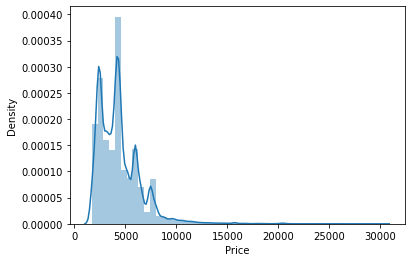

In [99]:
sns.distplot(data["Price"])

**As we can infer from the plot that our target varialbe is not uniform distribution, so we may need to transform it to make it uniform.**

In [100]:
data["Airline_Name"].value_counts()

IndiGo       31646
Go First     10235
Vistara       9834
Air India     9600
AirAsia       6689
Spicejet      6032
TruJet          84
Star Air        69
Name: Airline_Name, dtype: int64

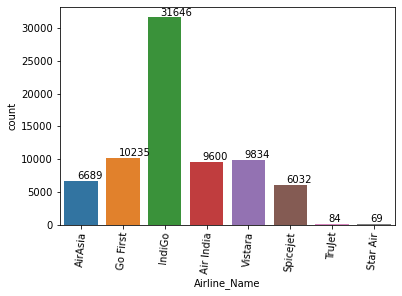

In [101]:
s=sns.countplot(data["Airline_Name"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

In [102]:
data["Departure_timerange"].value_counts()

6 to 9 AM     19473
6 to 9 PM     12894
3 to 6 PM     11508
9 to 12 AM    10727
12 to 3 PM     7867
3 to 6 AM      7032
00 to 3 AM     2595
9 to 12 PM     2093
Name: Departure_timerange, dtype: int64

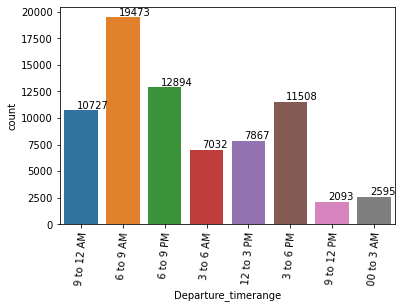

In [103]:
s=sns.countplot(data["Departure_timerange"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [104]:
data["Departure_City"].value_counts()

New Delhi    24490
Mumbai       21880
Bengaluru    17911
Kolkata       9908
Name: Departure_City, dtype: int64

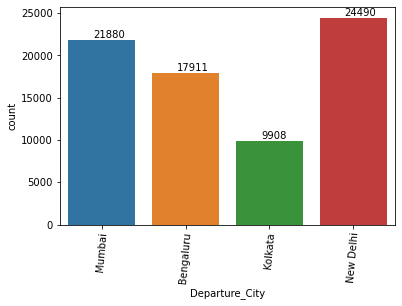

In [105]:
s=sns.countplot(data["Departure_City"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

<AxesSubplot:xlabel='Journey_Minute', ylabel='Density'>

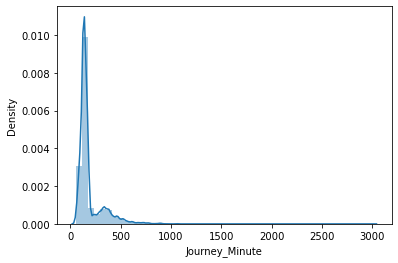

In [106]:
sns.distplot(data["Journey_Minute"])

In [107]:
data["stoppage_details"].value_counts()

Non stop    58940
1 stop      14886
2 stop        333
3 stop         22
4 stop          8
Name: stoppage_details, dtype: int64

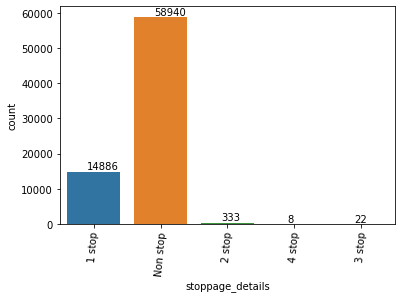

In [108]:
s=sns.countplot(data["stoppage_details"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

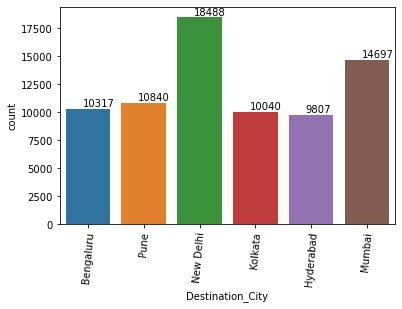

In [109]:
s=sns.countplot(data["Destination_City"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

## 7.2 Bivariate Analysis

<AxesSubplot:xlabel='Airline_Name', ylabel='Price'>

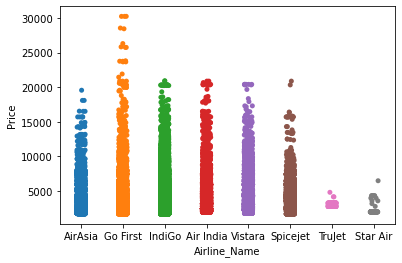

In [110]:
sns.stripplot(data["Airline_Name"],data["Price"])

In [111]:
grouped=data.groupby(data["Airline_Name"])
s=grouped.mean()


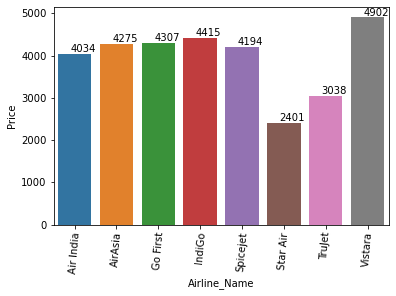

In [112]:
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

<AxesSubplot:xlabel='departure_month', ylabel='Price'>

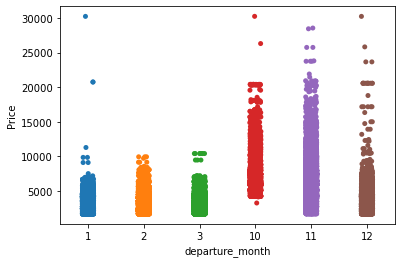

In [113]:
sns.stripplot(data["departure_month"],data["Price"])

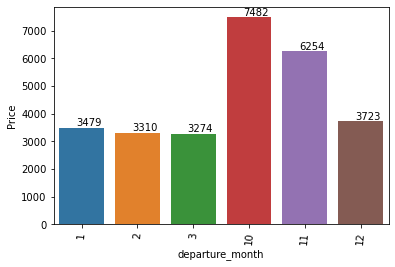

In [114]:
grouped=data.groupby(data["departure_month"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

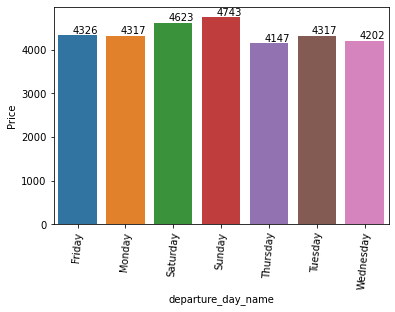

In [115]:
grouped=data.groupby(data["departure_day_name"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

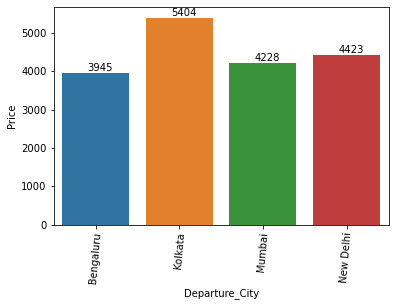

In [116]:
grouped=data.groupby(data["Departure_City"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

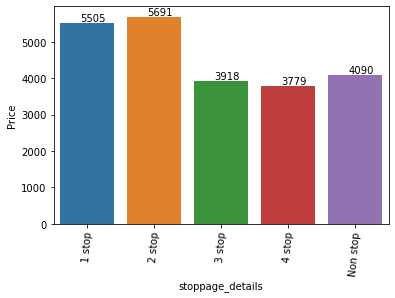

In [117]:
grouped=data.groupby(data["stoppage_details"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

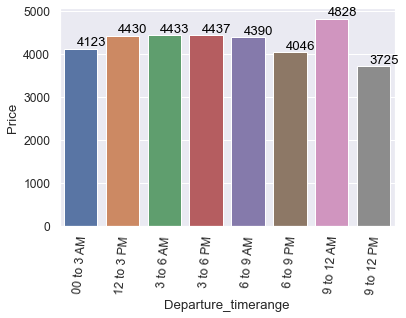

In [157]:
grouped=data.groupby(data["Departure_timerange"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

<AxesSubplot:xlabel='stoppage_details', ylabel='Price'>

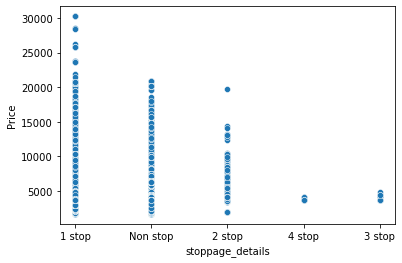

In [118]:
sns.scatterplot(x=data["stoppage_details"],y=data["Price"])

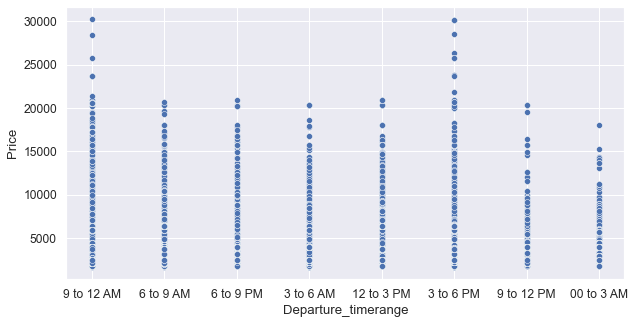

In [156]:
plt.figure(figsize=(10,5))
s=sns.scatterplot(x=data["Departure_timerange"],y=data["Price"],)


<AxesSubplot:xlabel='Airline_Name', ylabel='stoppage_details'>

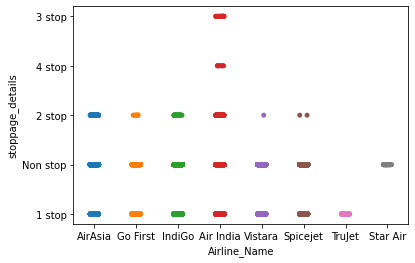

In [119]:
sns.stripplot(x=data["Airline_Name"],y=data["stoppage_details"])

<AxesSubplot:xlabel='Airline_Name', ylabel='Journey_Minute'>

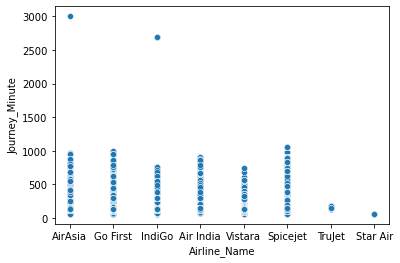

In [120]:
sns.scatterplot(x=data["Airline_Name"],y=data["Journey_Minute"],data=data)

## 7.3 Multivariate Analysis

<AxesSubplot:xlabel='Airline_Name', ylabel='Price'>

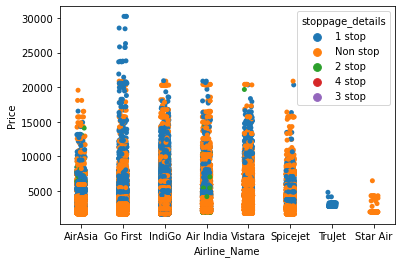

In [121]:
sns.stripplot(x=data["Airline_Name"],y=data["Price"],data=data,hue="stoppage_details")

<AxesSubplot:xlabel='Departure_City', ylabel='Departure_timerange'>

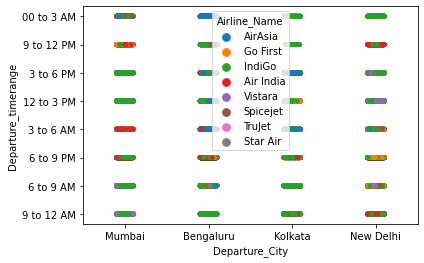

In [122]:
sns.stripplot(x=data["Departure_City"],y=data["Departure_timerange"],data=data,hue="Airline_Name")

<AxesSubplot:xlabel='Airline_Name', ylabel='Price'>

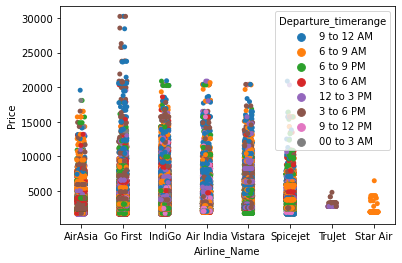

In [123]:
sns.stripplot(x=data["Airline_Name"],y=data["Price"],data=data,hue="Departure_timerange",jitter=True)

In [162]:
d=data.groupby(data["Airline_Name"])

In [172]:
grouped=data.groupby(data["Departure_timerange"])
s=grouped.count()

In [178]:
data[data["Departure_timerange"]=="6 to 9 AM"]

,Airline_Name,Departure_City,Destination_City,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Departure_timerange,Journey_Minute,stoppage_details,arrival_time,arrival_hour,arrival_minute
1,Go First,Mumbai,Bengaluru,5102.0,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,6 to 9 AM,4.615121,Non stop,1900-01-01 07:45:00,7,45
5,IndiGo,Mumbai,Bengaluru,5103.0,2021-10-26 07:05:00,2021,10,26,Tuesday,7,5,6 to 9 AM,4.753590,Non stop,1900-01-01 09:00:00,9,0
6,IndiGo,Mumbai,Bengaluru,5103.0,2021-10-26 08:35:00,2021,10,26,Tuesday,8,35,6 to 9 AM,4.615121,Non stop,1900-01-01 10:15:00,10,15
21,Vistara,Mumbai,Bengaluru,5996.0,2021-10-26 07:00:00,2021,10,26,Tuesday,7,0,6 to 9 AM,4.709530,Non stop,1900-01-01 08:50:00,8,50
24,Go First,Mumbai,Bengaluru,5102.0,2021-10-27 06:05:00,2021,10,27,Wednesday,6,5,6 to 9 AM,4.615121,Non stop,1900-01-01 07:45:00,7,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74176,IndiGo,New Delhi,Hyderabad,2510.0,2022-03-31 06:40:00,2022,3,31,Thursday,6,40,6 to 9 AM,4.948760,Non stop,1900-01-01 09:00:00,9,0
74177,IndiGo,New Delhi,Hyderabad,2510.0,2022-03-31 07:55:00,2022,3,31,Thursday,7,55,6 to 9 AM,4.912655,Non stop,1900-01-01 10:10:00,10,10
74181,Go First,New Delhi,Hyderabad,3120.0,2022-03-31 07:40:00,2022,3,31,Thursday,7,40,6 to 9 AM,4.875197,Non stop,1900-01-01 09:50:00,9,50
74185,Spicejet,New Delhi,Hyderabad,3752.0,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6 to 9 AM,6.343008,1 stop,1900-01-01 20:10:00,20,10


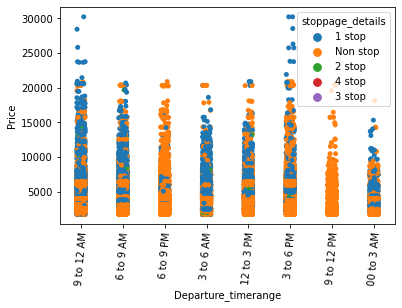

In [124]:
s=sns.stripplot(x=data["Departure_timerange"],y=data["Price"],data=data,hue="stoppage_details",jitter=True)
s.set_xticklabels(s.get_xticklabels(),rotation=85);

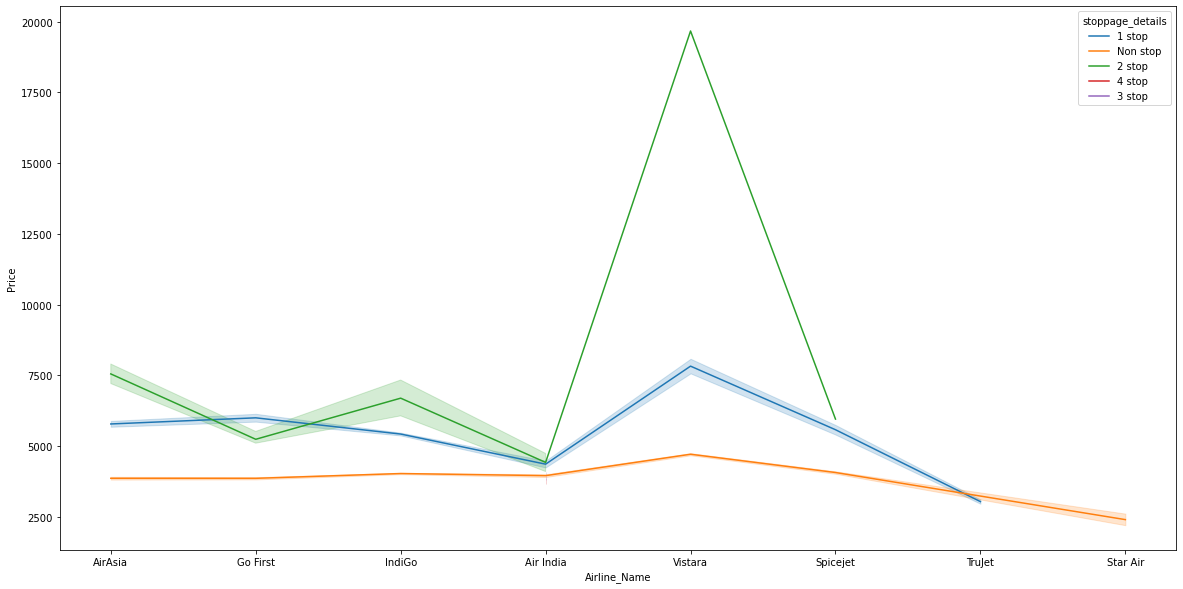

In [125]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Airline_Name",y="Price",hue="stoppage_details",data=data)
plt.show()

In [126]:
data.columns

Index(['Airline_Name', 'Departure_City', 'Destination_City', 'Price',
       'departure_dt', 'departure_year', 'departure_month', 'departure_day',
       'departure_day_name', 'departure_hour', 'departure_minute',
       'Departure_timerange', 'Journey_Minute', 'stoppage_details',
       'arrival_time', 'arrival_hour', 'arrival_minute'],
      dtype='object')

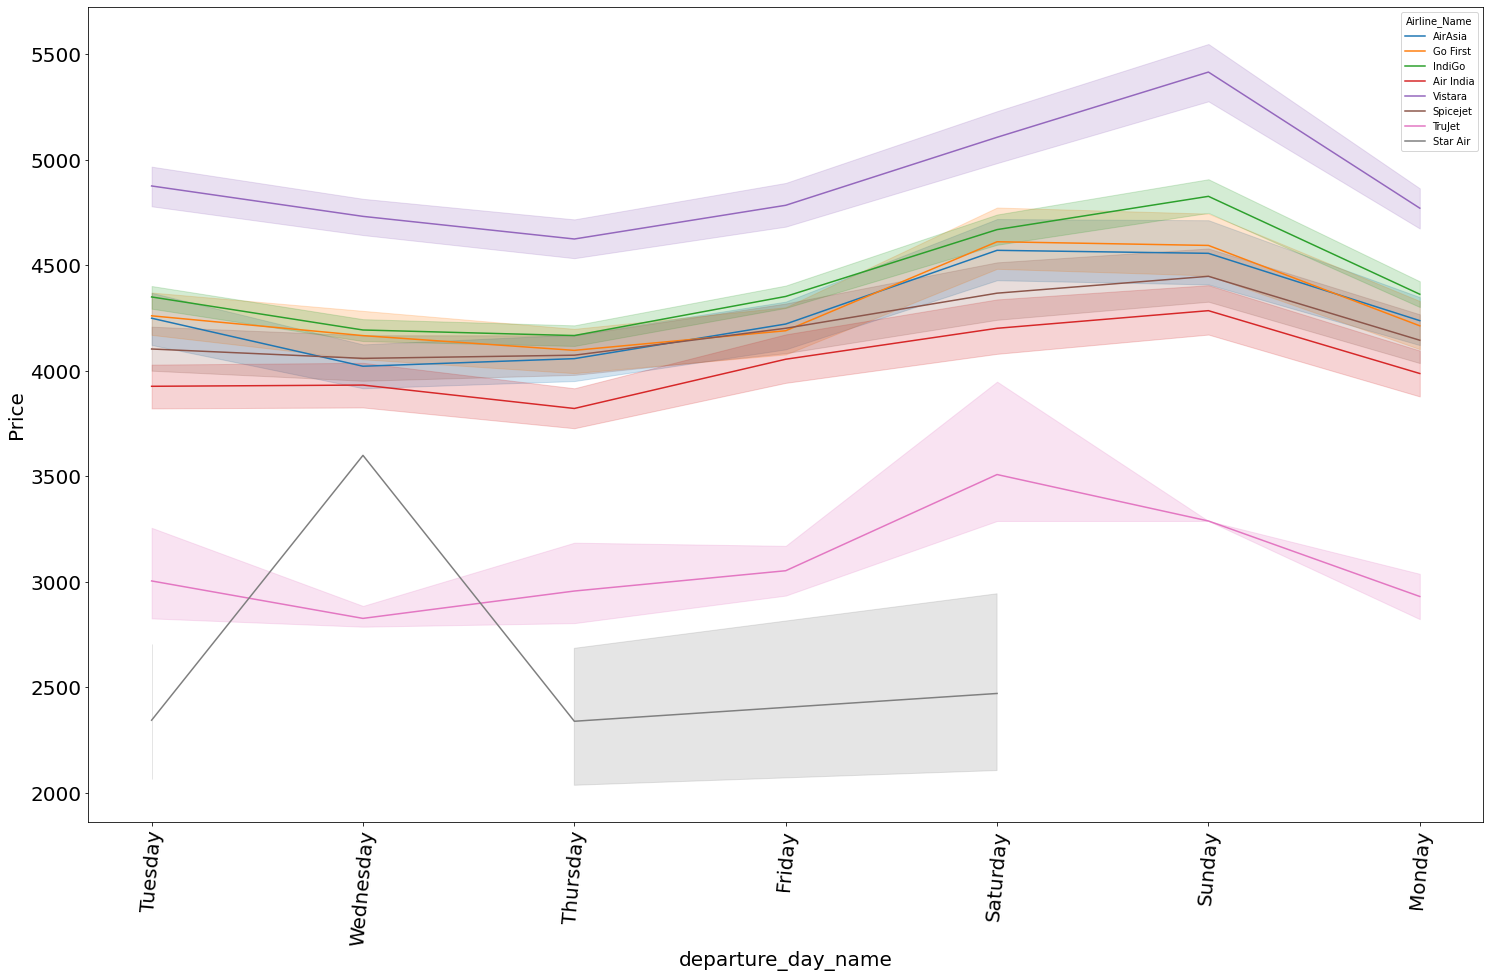

In [127]:
fig, ax = plt.subplots(figsize=(25,15))
#plt.figure(figsize=(25,15),dpi=100)
sns.lineplot(x="departure_day_name",y="Price",hue="Airline_Name",data=data,)
plt.xticks(fontsize=20, rotation=85)
plt.yticks(fontsize=20, rotation=360)
ax.set_xlabel('departure_day_name', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
#plt.xlables(fontsize=20)
plt.show()

In [128]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in data.columns:
    if data[column].dtypes in num:
        numeric_feat.append(column)
    if data[column].dtypes in cat:
        categorical_feat.append(column)

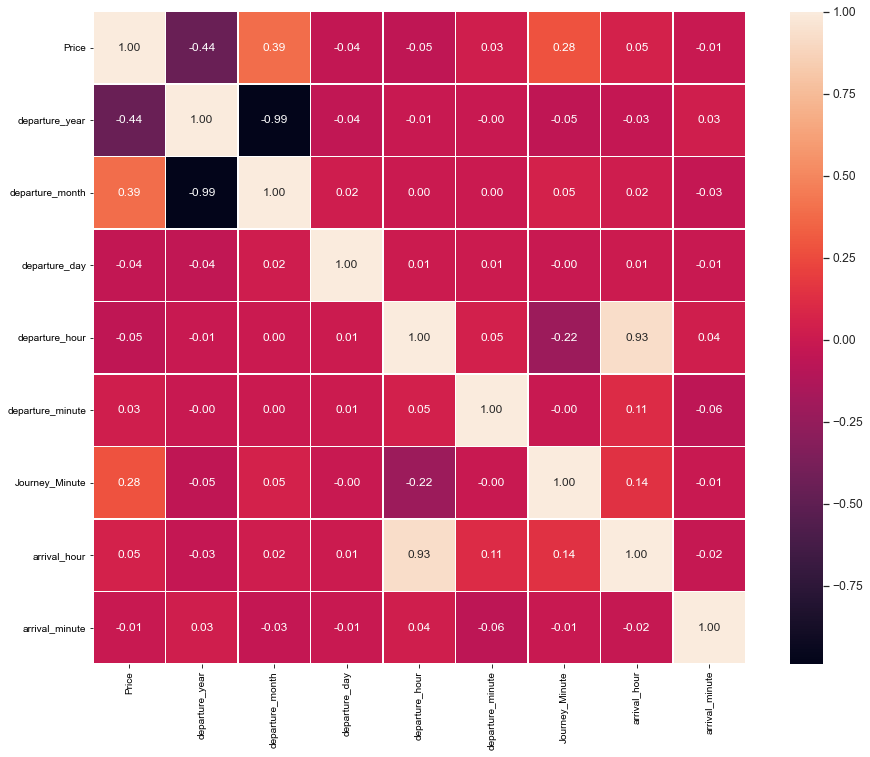

In [129]:
plt.subplots(figsize=(16,12))
cm=np.corrcoef(data[numeric_feat].values.T)
sns.set(font_scale=1.1)
heatmap=sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':12}, yticklabels = numeric_feat, xticklabels = numeric_feat,linewidths=.5)

# 8. Numeric Feature Correlation

In [130]:
corr=data.corr()

In [131]:
d=pd.DataFrame(corr)

In [132]:
d.rename(columns={"Price":"Coefficient"},inplace=True)

In [133]:
d.sort_values(by="Coefficient",inplace=True)

<AxesSubplot:>

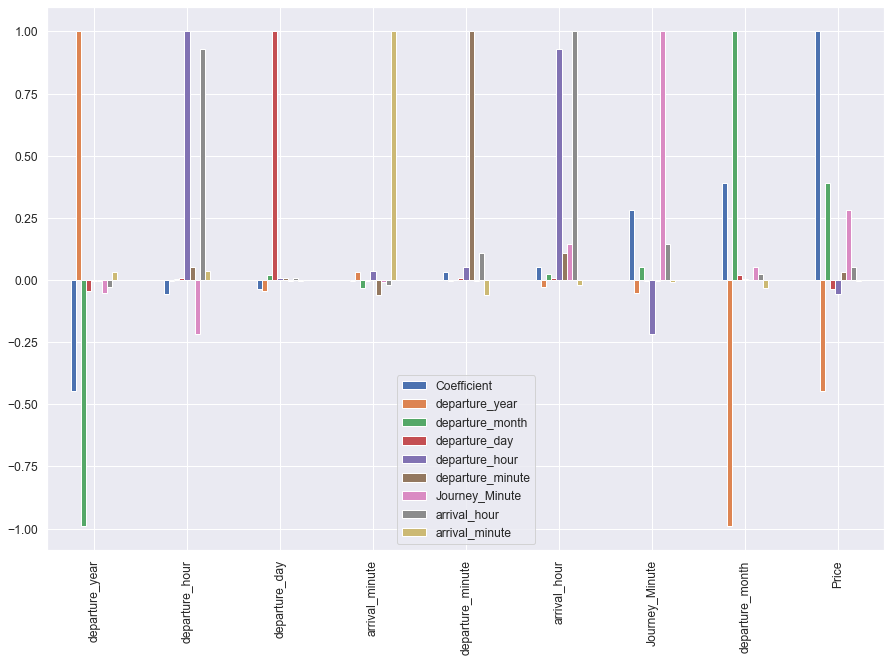

In [134]:
d.plot(kind='bar',figsize=(15,10))

# 9. Categorical Features importance

In [135]:
from scipy import stats
from scipy.stats import f_oneway

In [136]:
cat_data = data.select_dtypes(exclude=[np.number])

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

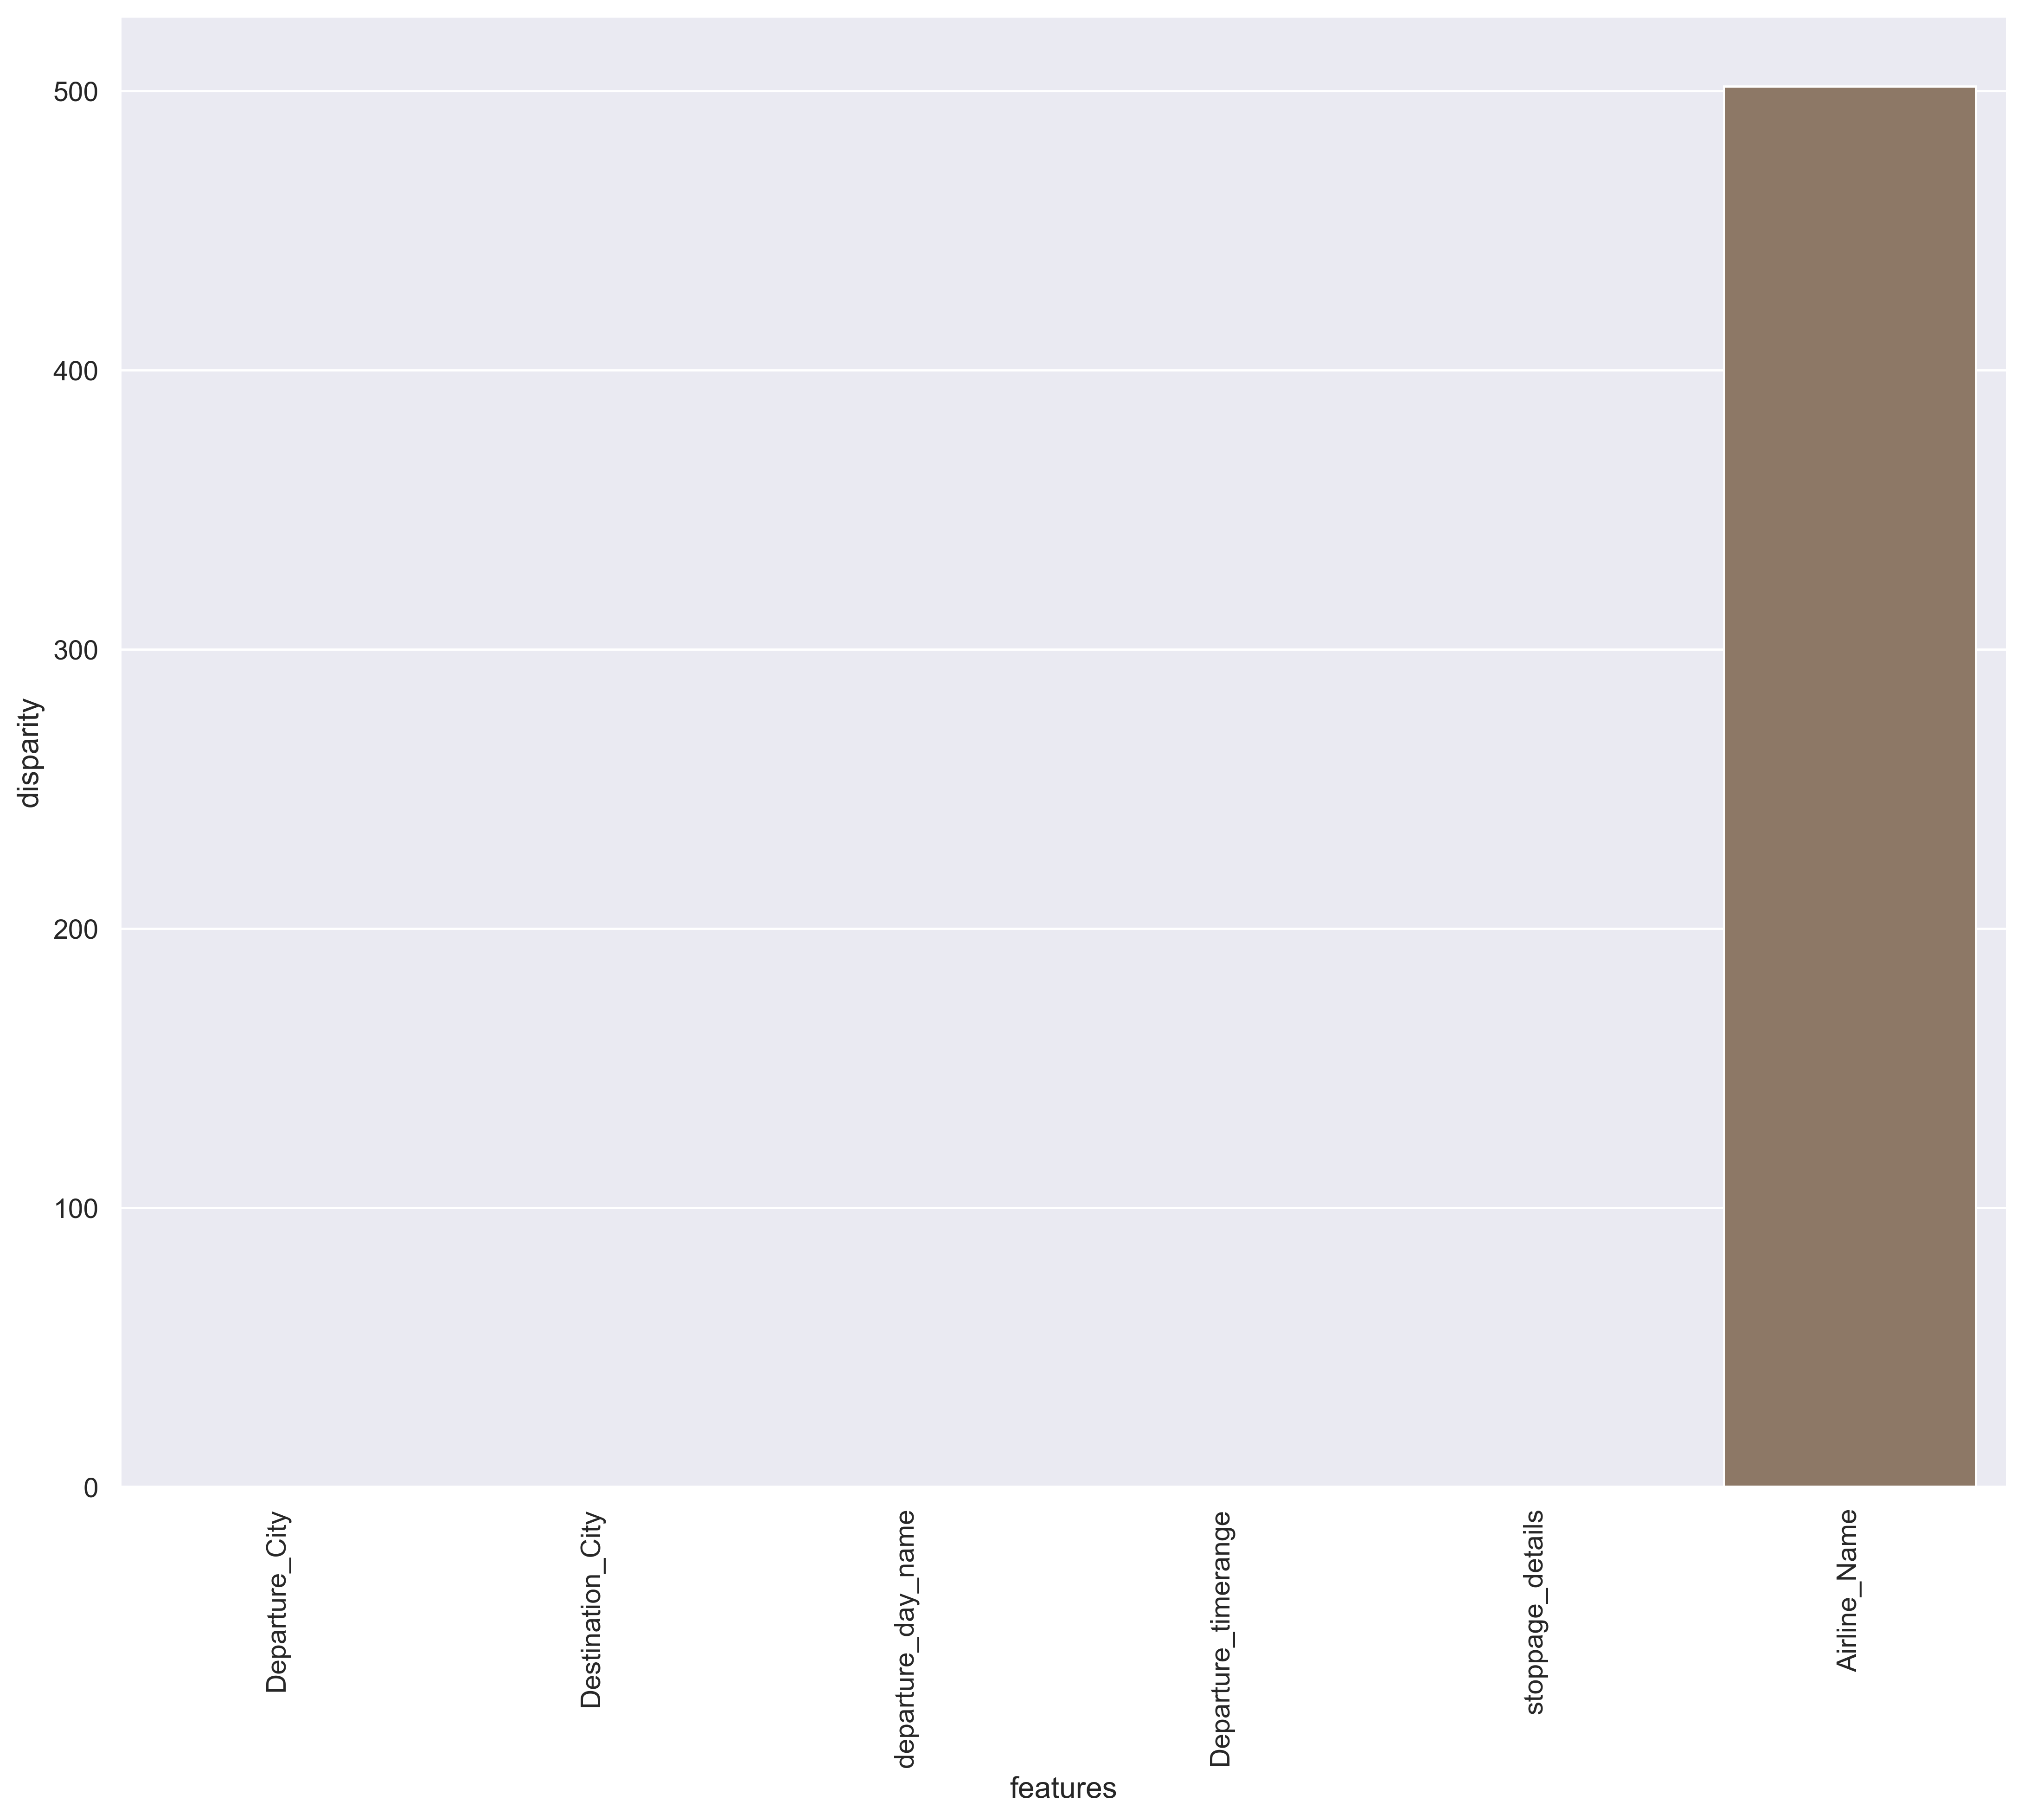

In [137]:
cat = [f for f in data.columns if data.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    samples = []
    for c in cat:
        
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['Price'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['Price'] = data.Price.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
plt.figure(figsize=(15,12),dpi=350)
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

# 10. Checking Outliers

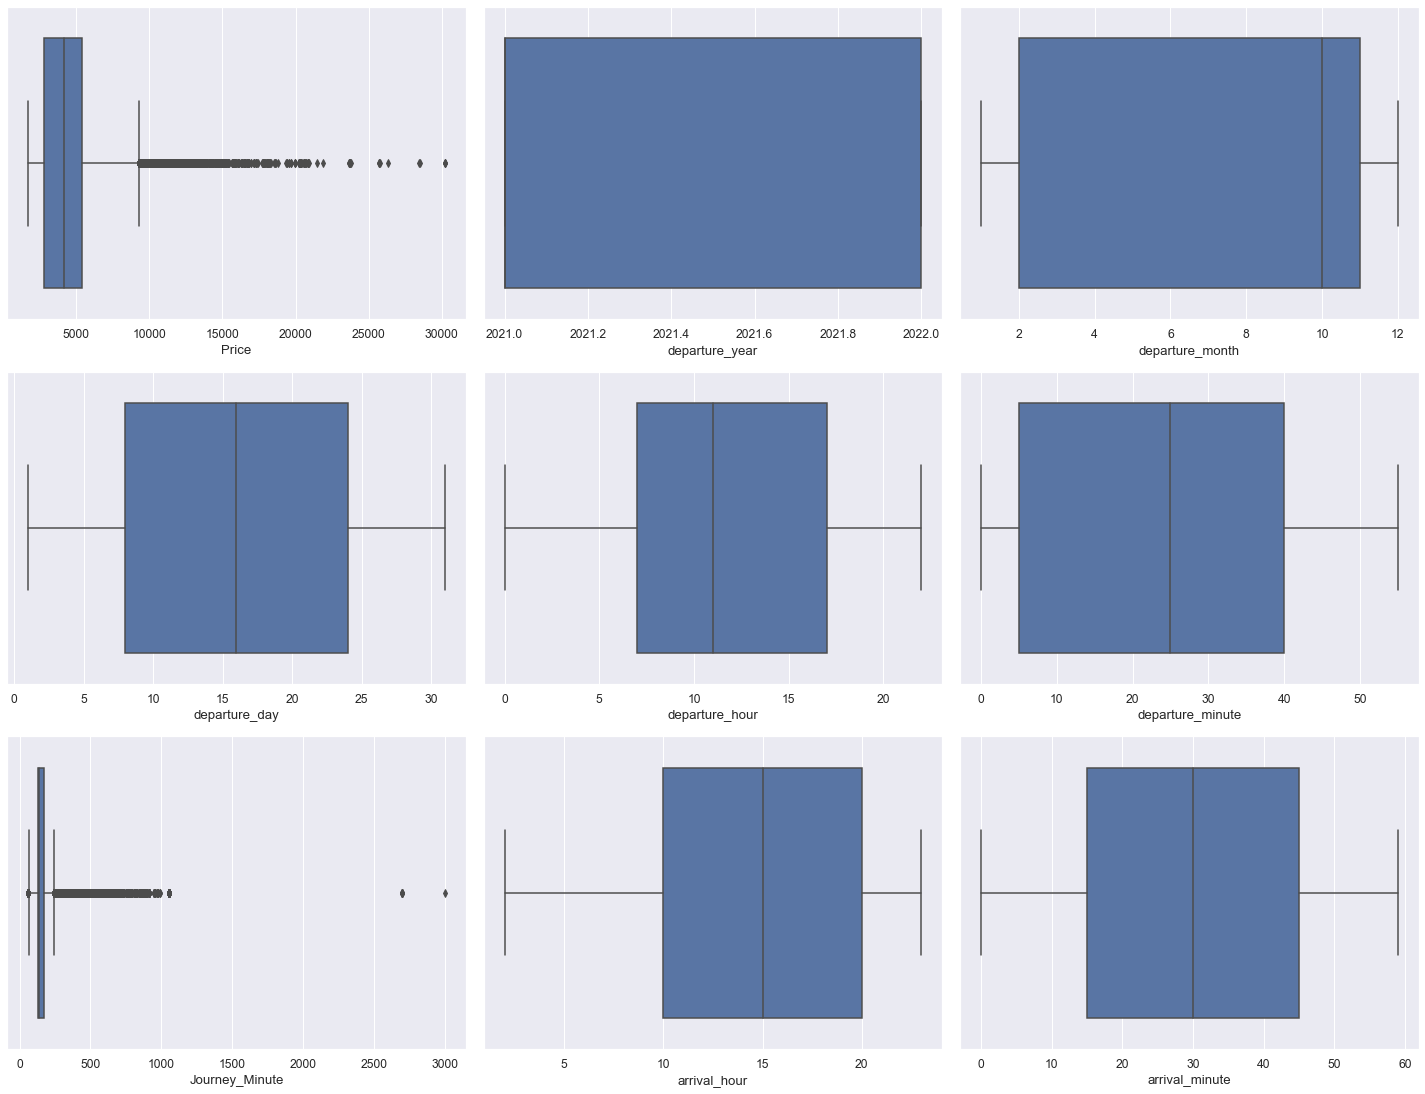

In [138]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data[numeric_feat]:
    if plotnumber <=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column],orient="v")
    plotnumber+=1
plt.tight_layout()

# 11. Checking the skewness

In [139]:
data.skew()

Price               2.100453
departure_year      0.144633
departure_month    -0.160885
departure_day      -0.025551
departure_hour      0.114740
departure_minute    0.089289
Journey_Minute      3.191692
arrival_hour       -0.093625
arrival_minute     -0.054928
dtype: float64

# 12. Dealing with Outliers

## Journey Minute

<AxesSubplot:xlabel='Journey_Minute'>

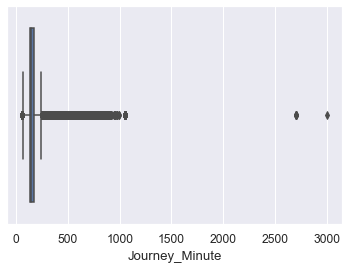

In [140]:
sns.boxplot(data["Journey_Minute"])

In [141]:
upper_limit=data["Journey_Minute"].mean()+3*data["Journey_Minute"].std()
lower_limit=data["Journey_Minute"].mean()-3*data["Journey_Minute"].std()

data["Journey_Minute"]=np.where(data["Journey_Minute"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["Journey_Minute"]<lower_limit,
                           lower_limit,
                           data["Journey_Minute"]
                        )
                    )

<AxesSubplot:xlabel='Journey_Minute'>

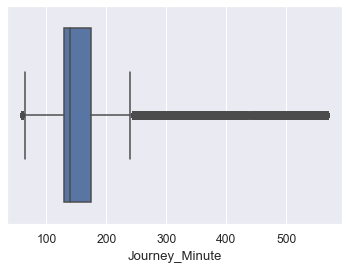

In [142]:
sns.boxplot(data["Journey_Minute"])

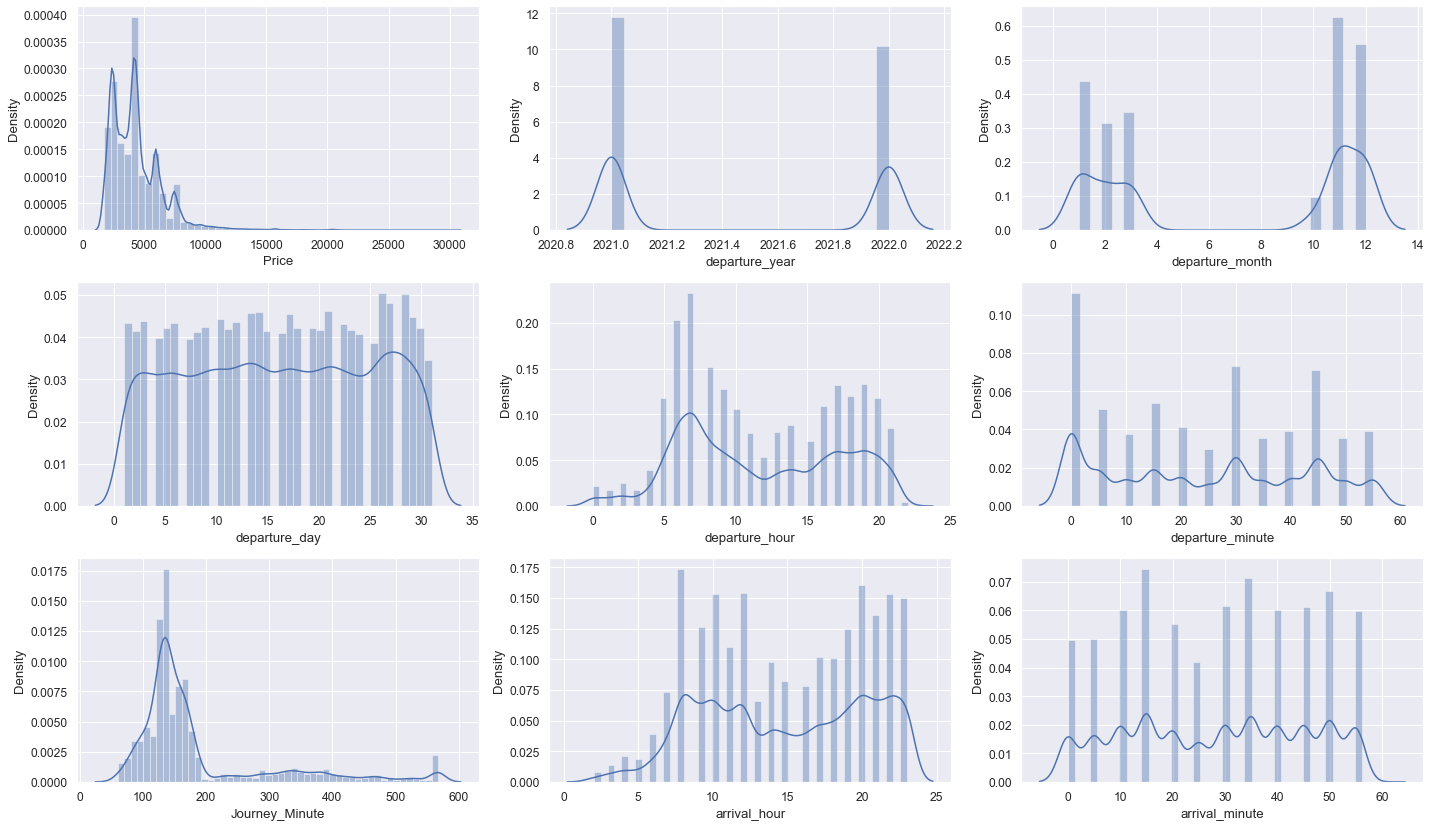

In [143]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in data[numeric_feat]:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

# 13. Dealing with skewness

<AxesSubplot:xlabel='Journey_Minute', ylabel='Density'>

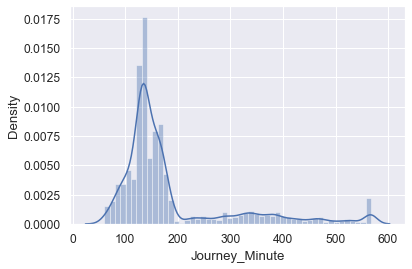

In [144]:
sns.distplot(data["Journey_Minute"])

In [145]:
data["Journey_Minute"]=np.log1p(data["Journey_Minute"])

<AxesSubplot:xlabel='Journey_Minute', ylabel='Density'>

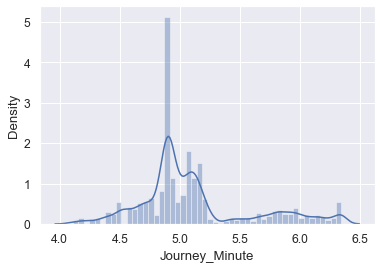

In [146]:
sns.distplot(data["Journey_Minute"])

In [148]:
data["Price"]=data["Price"].astype(int)

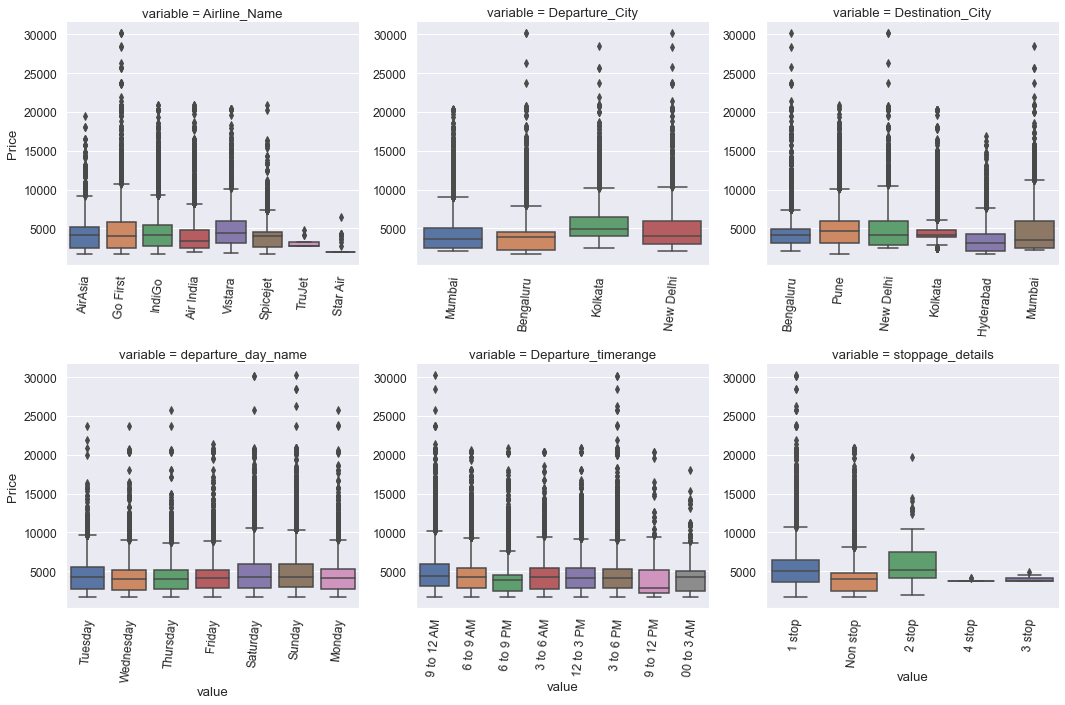

In [149]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=85)

cat = [f for f in data.columns if data.dtypes[f] == 'object']

p = pd.melt(data, id_vars='Price', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','Price')
g


# 14. Feature Transformation for Categorical columns

In [150]:
data.shape

(74189, 17)

In [151]:
cat = [f for f in data.columns if data.dtypes[f] == 'object']

In [152]:
print(cat,end="")

['Airline_Name', 'Departure_City', 'Destination_City', 'departure_day_name', 'Departure_timerange', 'stoppage_details']

In [153]:
data.reset_index(drop=True,inplace=True)

In [154]:
data

,Airline_Name,Departure_City,Destination_City,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Departure_timerange,Journey_Minute,stoppage_details,arrival_time,arrival_hour,arrival_minute
0,AirAsia,Mumbai,Bengaluru,5100,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,9 to 12 AM,6.077642,1 stop,1900-01-01 18:55:00,18,55
1,Go First,Mumbai,Bengaluru,5102,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,6 to 9 AM,4.615121,Non stop,1900-01-01 07:45:00,7,45
2,Go First,Mumbai,Bengaluru,5102,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,6 to 9 PM,4.615121,Non stop,1900-01-01 19:45:00,19,45
3,Go First,Mumbai,Bengaluru,5102,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,9 to 12 AM,5.375278,1 stop,1900-01-01 13:25:00,13,25
4,IndiGo,Mumbai,Bengaluru,5103,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,3 to 6 AM,4.564348,Non stop,1900-01-01 06:45:00,6,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,IndiGo,New Delhi,Hyderabad,3750,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,3 to 6 PM,4.948760,Non stop,1900-01-01 20:00:00,20,0
74185,Spicejet,New Delhi,Hyderabad,3752,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6 to 9 AM,6.343008,1 stop,1900-01-01 20:10:00,20,10
74186,Vistara,New Delhi,Hyderabad,6376,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,6 to 9 AM,4.948760,Non stop,1900-01-01 09:25:00,9,25
74187,Vistara,New Delhi,Hyderabad,6376,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,12 to 3 PM,4.912655,Non stop,1900-01-01 17:00:00,17,0


# 14.1 Airline_Name Encoding

In [155]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()

In [156]:
data["Airline_Name"].value_counts()

IndiGo       31646
Go First     10235
Vistara       9834
Air India     9600
AirAsia       6689
Spicejet      6032
TruJet          84
Star Air        69
Name: Airline_Name, dtype: int64

In [157]:
j=data["Airline_Name"].value_counts()

In [158]:
x=onehotencoder.fit_transform(data.Airline_Name.values.reshape(-1,1)).toarray()
j=data["Airline_Name"].value_counts()
dfonehot=pd.DataFrame(x,columns=["Airline_Name_"+(i)for i in j.index])
data=pd.concat([data,dfonehot],axis=1)
data.drop("Airline_Name",axis=1,inplace=True)

In [159]:
data

,Departure_City,Destination_City,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,...,arrival_hour,arrival_minute,Airline_Name_IndiGo,Airline_Name_Go First,Airline_Name_Vistara,Airline_Name_Air India,Airline_Name_AirAsia,Airline_Name_Spicejet,Airline_Name_TruJet,Airline_Name_Star Air
0,Mumbai,Bengaluru,5100,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,...,18,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mumbai,Bengaluru,5102,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,...,7,45,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Mumbai,Bengaluru,5102,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,...,19,45,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Mumbai,Bengaluru,5102,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,...,13,25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Mumbai,Bengaluru,5103,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,...,6,45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,New Delhi,Hyderabad,3750,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,...,20,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74185,New Delhi,Hyderabad,3752,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,...,20,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74186,New Delhi,Hyderabad,6376,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,...,9,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74187,New Delhi,Hyderabad,6376,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,...,17,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 14.2 Destination_City Encoding

In [160]:
data["Destination_City"].value_counts()

New Delhi    18488
Mumbai       14697
Pune         10840
Bengaluru    10317
Kolkata      10040
Hyderabad     9807
Name: Destination_City, dtype: int64

In [161]:
x=onehotencoder.fit_transform(data.Destination_City.values.reshape(-1,1)).toarray()
j=data["Destination_City"].value_counts()
dfonehot=pd.DataFrame(x,columns=["Destination_City_"+(i)for i in j.index])
data=pd.concat([data,dfonehot],axis=1)
data.drop("Destination_City",axis=1,inplace=True)

In [162]:
data

,Departure_City,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Departure_timerange,...,Airline_Name_AirAsia,Airline_Name_Spicejet,Airline_Name_TruJet,Airline_Name_Star Air,Destination_City_New Delhi,Destination_City_Mumbai,Destination_City_Pune,Destination_City_Bengaluru,Destination_City_Kolkata,Destination_City_Hyderabad
0,Mumbai,5100,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,9 to 12 AM,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Mumbai,5102,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,6 to 9 AM,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Mumbai,5102,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,6 to 9 PM,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Mumbai,5102,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,9 to 12 AM,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Mumbai,5103,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,3 to 6 AM,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,New Delhi,3750,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,3 to 6 PM,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74185,New Delhi,3752,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6 to 9 AM,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74186,New Delhi,6376,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,6 to 9 AM,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
74187,New Delhi,6376,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,12 to 3 PM,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# 14.3 Departure_City Encoding

In [163]:
data["Departure_City"].value_counts()

New Delhi    24490
Mumbai       21880
Bengaluru    17911
Kolkata       9908
Name: Departure_City, dtype: int64

In [164]:
x=onehotencoder.fit_transform(data.Departure_City.values.reshape(-1,1)).toarray()
j=data["Departure_City"].value_counts()
dfonehot=pd.DataFrame(x,columns=["Departure_City"+(i)for i in j.index])
data=pd.concat([data,dfonehot],axis=1)
data.drop("Departure_City",axis=1,inplace=True)

In [165]:
data

,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Departure_timerange,Journey_Minute,...,Destination_City_New Delhi,Destination_City_Mumbai,Destination_City_Pune,Destination_City_Bengaluru,Destination_City_Kolkata,Destination_City_Hyderabad,Departure_CityNew Delhi,Departure_CityMumbai,Departure_CityBengaluru,Departure_CityKolkata
0,5100,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,9 to 12 AM,6.077642,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5102,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,6 to 9 AM,4.615121,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5102,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,6 to 9 PM,4.615121,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5102,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,9 to 12 AM,5.375278,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5103,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,3 to 6 AM,4.564348,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,3750,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,3 to 6 PM,4.948760,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74185,3752,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6 to 9 AM,6.343008,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74186,6376,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,6 to 9 AM,4.948760,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74187,6376,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,12 to 3 PM,4.912655,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 14.4 Departure Timerange Encoding

In [166]:
data["Departure_timerange"].value_counts()

6 to 9 AM     19473
6 to 9 PM     12894
3 to 6 PM     11508
9 to 12 AM    10727
12 to 3 PM     7867
3 to 6 AM      7032
00 to 3 AM     2595
9 to 12 PM     2093
Name: Departure_timerange, dtype: int64

In [167]:
x=onehotencoder.fit_transform(data.Departure_timerange.values.reshape(-1,1)).toarray()
j=data["Departure_timerange"].value_counts()
dfonehot=pd.DataFrame(x,columns=["Departure_timerange"+(i)for i in j.index])
data=pd.concat([data,dfonehot],axis=1)
data.drop("Departure_timerange",axis=1,inplace=True)

In [168]:
data

,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Journey_Minute,stoppage_details,...,Departure_CityBengaluru,Departure_CityKolkata,Departure_timerange6 to 9 AM,Departure_timerange6 to 9 PM,Departure_timerange3 to 6 PM,Departure_timerange9 to 12 AM,Departure_timerange12 to 3 PM,Departure_timerange3 to 6 AM,Departure_timerange00 to 3 AM,Departure_timerange9 to 12 PM
0,5100,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,6.077642,1 stop,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5102,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,4.615121,Non stop,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5102,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,4.615121,Non stop,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5102,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,5.375278,1 stop,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5103,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,4.564348,Non stop,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,3750,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,4.948760,Non stop,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74185,3752,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6.343008,1 stop,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74186,6376,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,4.948760,Non stop,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74187,6376,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,4.912655,Non stop,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 14.5 Stoppage_details Econding

In [169]:
data["stoppage_details"].value_counts()

Non stop    58940
1 stop      14886
2 stop        333
3 stop         22
4 stop          8
Name: stoppage_details, dtype: int64

In [170]:
from sklearn.preprocessing import OrdinalEncoder

In [171]:
enc=OrdinalEncoder(categories=[["4 stop","3 stop","2 stop","1 stop","Non stop"]])

In [172]:
z=enc.fit_transform(data.stoppage_details.values.reshape(-1,1))

In [173]:
data["stoppage_details"]=z

In [174]:
data

,Price,departure_dt,departure_year,departure_month,departure_day,departure_day_name,departure_hour,departure_minute,Journey_Minute,stoppage_details,...,Departure_CityBengaluru,Departure_CityKolkata,Departure_timerange6 to 9 AM,Departure_timerange6 to 9 PM,Departure_timerange3 to 6 PM,Departure_timerange9 to 12 AM,Departure_timerange12 to 3 PM,Departure_timerange3 to 6 AM,Departure_timerange00 to 3 AM,Departure_timerange9 to 12 PM
0,5100,2021-10-26 11:40:00,2021,10,26,Tuesday,11,40,6.077642,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5102,2021-10-26 06:05:00,2021,10,26,Tuesday,6,5,4.615121,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5102,2021-10-26 18:05:00,2021,10,26,Tuesday,18,5,4.615121,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5102,2021-10-26 09:50:00,2021,10,26,Tuesday,9,50,5.375278,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5103,2021-10-26 05:10:00,2021,10,26,Tuesday,5,10,4.564348,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74184,3750,2022-03-31 17:40:00,2022,3,31,Thursday,17,40,4.948760,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74185,3752,2022-03-31 06:10:00,2022,3,31,Thursday,6,10,6.343008,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74186,6376,2022-03-31 07:05:00,2022,3,31,Thursday,7,5,4.948760,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74187,6376,2022-03-31 14:45:00,2022,3,31,Thursday,14,45,4.912655,4.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 14.6 Departure_day_Name encoding

In [175]:
data.columns

Index(['Price', 'departure_dt', 'departure_year', 'departure_month',
       'departure_day', 'departure_day_name', 'departure_hour',
       'departure_minute', 'Journey_Minute', 'stoppage_details',
       'arrival_time', 'arrival_hour', 'arrival_minute', 'Airline_Name_IndiGo',
       'Airline_Name_Go First', 'Airline_Name_Vistara',
       'Airline_Name_Air India', 'Airline_Name_AirAsia',
       'Airline_Name_Spicejet', 'Airline_Name_TruJet', 'Airline_Name_Star Air',
       'Destination_City_New Delhi', 'Destination_City_Mumbai',
       'Destination_City_Pune', 'Destination_City_Bengaluru',
       'Destination_City_Kolkata', 'Destination_City_Hyderabad',
       'Departure_CityNew Delhi', 'Departure_CityMumbai',
       'Departure_CityBengaluru', 'Departure_CityKolkata',
       'Departure_timerange6 to 9 AM', 'Departure_timerange6 to 9 PM',
       'Departure_timerange3 to 6 PM', 'Departure_timerange9 to 12 AM',
       'Departure_timerange12 to 3 PM', 'Departure_timerange3 to 6 AM',
      

In [176]:
data["departure_day_name"].value_counts()

Friday       10875
Thursday     10771
Wednesday    10579
Sunday       10579
Monday       10559
Saturday     10492
Tuesday      10334
Name: departure_day_name, dtype: int64

In [177]:
x=onehotencoder.fit_transform(data.departure_day_name.values.reshape(-1,1)).toarray()
j=data["departure_day_name"].value_counts()
dfonehot=pd.DataFrame(x,columns=["departure_day_name"+(i)for i in j.index])
data=pd.concat([data,dfonehot],axis=1)
data.drop("departure_day_name",axis=1,inplace=True)

# 15. Target Variable Transformation

<AxesSubplot:xlabel='Price', ylabel='Density'>

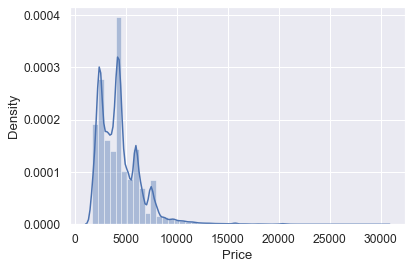

In [178]:
sns.distplot(data["Price"])

In [179]:
data["Price"]=np.log(data["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

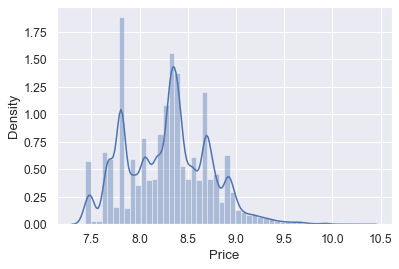

In [180]:
sns.distplot(data["Price"])

# 16. Spliting training dataset

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74189 entries, 0 to 74188
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Price                          74189 non-null  float64       
 1   departure_dt                   74189 non-null  datetime64[ns]
 2   departure_year                 74189 non-null  int64         
 3   departure_month                74189 non-null  int64         
 4   departure_day                  74189 non-null  int64         
 5   departure_hour                 74189 non-null  int64         
 6   departure_minute               74189 non-null  int64         
 7   Journey_Minute                 74189 non-null  float64       
 8   stoppage_details               74189 non-null  float64       
 9   arrival_time                   74189 non-null  datetime64[ns]
 10  arrival_hour                   74189 non-null  int64         
 11  arrival_minute 

In [182]:
data["Arrival_Time"] = data["arrival_time"].astype("int64") // 10**9

In [183]:
data["Departure_datetime"] = data["departure_dt"].astype("int64") // 10**9

In [184]:
data.drop(["arrival_time","departure_dt"],axis=1,inplace=True)

In [185]:
x=data.drop("Price",axis=1)

In [186]:
y=data["Price"]

In [187]:
x.shape

(74189, 44)

In [188]:
y.shape

(74189,)

# 17. Feature Transformation with Standard Scaler

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaler=StandardScaler()

In [191]:
x_scaled=scaler.fit_transform(x)

In [192]:
x_scaled.shape

(74189, 44)

In [193]:
x_scaled

array([[-0.93029637,  0.6350615 ,  1.11152306, ..., -0.40781163,
         0.66800671, -1.52269394],
       [-0.93029637,  0.6350615 ,  1.11152306, ..., -0.40781163,
        -1.35339139, -1.52791624],
       [-0.93029637,  0.6350615 ,  1.11152306, ..., -0.40781163,
         0.81885732, -1.5166922 ],
       ...,
       [ 1.07492626, -0.83514251,  1.67283957, ..., -0.40781163,
        -1.05169018,  1.97491911],
       [ 1.07492626, -0.83514251,  1.67283957, ..., -0.40781163,
         0.32105032,  1.98209003],
       [ 1.07492626, -0.83514251,  1.67283957, ..., -0.40781163,
         0.83394238,  1.98481809]])

# 18. Checking Multicolinearity

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [195]:
vif=pd.DataFrame()

In [196]:
vif["VIF"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

In [197]:
vif["Feature"]=x.columns

In [198]:
vif

,VIF,Feature
0,5.220278e+03,departure_year
1,1.485493e+04,departure_month
2,2.684399e+02,departure_day
3,1.127358e+02,departure_hour
4,1.274815e+00,departure_minute
5,1.431663e+01,Journey_Minute
6,5.762537e+00,stoppage_details
7,4.487838e+03,arrival_hour
8,4.358052e+03,arrival_minute
9,2.293237e+04,Airline_Name_IndiGo


# 19. Feature Extracting with PCA

In [199]:
from sklearn.decomposition import PCA

In [200]:
pca=PCA()

In [201]:
principalcomponent=pca.fit_transform(x_scaled)

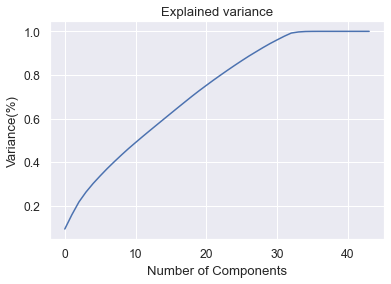

In [202]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance(%)")
plt.title("Explained variance")
plt.show()

In [203]:
pca=PCA(n_components=35)
new_data_pca=pca.fit_transform(x_scaled)

# 20. Model Building

## 20.1 Linear Regression

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
mlr=LinearRegression()

## 20.2 Checking Best Random state for model

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
mlr=LinearRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mlr.fit(x_train,y_train)
    pred_train=mlr.predict(x_train)
    pred_test=mlr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State",i,"Model perform well")
        print("At Random State",i)
        print("Training R2_score is-",r2_score(y_train,pred_train)*100)
        print("Testing R2_score is-",r2_score(y_test,pred_test)*100)

At Random State 1 Model perform well
At Random State 1
Training R2_score is- 60.457126844170816
Testing R2_score is- 60.5356517537067
At Random State 6 Model perform well
At Random State 6
Training R2_score is- 60.45761690449653
Testing R2_score is- 60.52543552621281
At Random State 49 Model perform well
At Random State 49
Training R2_score is- 60.428858218994144
Testing R2_score is- 60.38494036808964
At Random State 65 Model perform well
At Random State 65
Training R2_score is- 60.46157574587385
Testing R2_score is- 60.524683569295455
At Random State 72 Model perform well
At Random State 72
Training R2_score is- 60.453701904655155
Testing R2_score is- 60.47648048401091
At Random State 90 Model perform well
At Random State 90
Training R2_score is- 60.46893859845655
Testing R2_score is- 60.474332016837074
At Random State 96 Model perform well
At Random State 96
Training R2_score is- 60.4647741590605
Testing R2_score is- 60.483092904577916
At Random State 126 Model perform well
At Random

**We can choose best Random state 59**

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=90)

In [208]:
mlr.fit(x_train,y_train)

LinearRegression()

## 20.3 Evaluation Matrix

In [209]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [210]:
y_pred=mlr.predict(x_test)

In [211]:
mlr_score=r2_score(y_test,y_pred)

In [212]:
mlr_score

0.6047433201683707

In [213]:
MAE=mean_absolute_error(y_test,y_pred)

In [214]:
MAE

0.2135698744447148

In [215]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [216]:
RMSE

0.2729779390792992

In [217]:
data["Price"].mean()

8.287349970528272

In [218]:
train_pred=mlr.predict(x_train)

In [219]:
r2_score(y_train,train_pred)

0.6046893859845656

## 20.4 Choosing the best CV

In [220]:
from sklearn.model_selection import cross_val_score

In [221]:
for j in range(2,15):
    mlr_score=cross_val_score(mlr,x_train,y_train,cv=j)
    mlr_s=mlr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",mlr_score*100)
    print("R2_score:",mlr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [60.38715428 59.06333762]
R2_score: 59.725245953306086


AT CV :- 3
Cross Validation score is: [58.90293389 60.5024602  60.42306178]
R2_score: 59.94281862422773


AT CV :- 4
Cross Validation score is: [60.11952    60.72603311 60.13544605 60.50596144]
R2_score: 60.37174014998956


AT CV :- 5
Cross Validation score is: [59.75179032 60.33375752 60.26223139 59.84836929 60.98523517]
R2_score: 60.23627673717223


AT CV :- 6
Cross Validation score is: [60.46533084 59.82201267 60.67575979 59.94297583 59.70895185 60.76159166]
R2_score: 60.22943710721099


AT CV :- 7
Cross Validation score is: [60.28227852 60.30582653 59.93153958 60.7737359  59.86295581 60.3698585
 61.00039982]
R2_score: 60.36094209478213


AT CV :- 8
Cross Validation score is: [60.38347666 59.65740537 60.27181667 60.9736517  59.33761248 60.52749276
 59.74806231 61.02650231]
R2_score: 60.240752532239725


AT CV :- 9
Cross Validation score is: [60.52940135 59.55128981 60.26671415 59.77168689 

In [222]:
cross_val_score(mlr,x_train,y_train,cv=14)

array([0.59441724, 0.61117081, 0.5964186 , 0.60935186, 0.59629933,
       0.60417071, 0.61385263, 0.59844848, 0.59392273, 0.60300514,
       0.60744853, 0.59776554, 0.60411748, 0.61550371])

In [223]:
mlr_cv_score=cross_val_score(mlr,x_train,y_train,cv=14).mean()

In [224]:
mlr_cv_score

0.6032780564918339

In [225]:
mlr_score=r2_score(y_test,y_pred)

In [226]:
mlr_score

0.6047433201683707

In [227]:
mlr_MAE=MAE

In [228]:
mlr_MAE

0.2135698744447148

## 20.5 Checking for Overfitting or Underfitting for model

In [229]:
from sklearn.model_selection import KFold

In [230]:
kf = KFold(n_splits=15,shuffle=True) 
training_error = []
training_R2_Score = []
testing_error = []
testing_R2_Score = []
for train_index,test_index in kf.split(x_scaled): 
    x_train,x_test = x_scaled[train_index],x_scaled[test_index]
    y_train,y_test = y[train_index],y[test_index]
    mlr = LinearRegression()
    mlr.fit(x_train,y_train)
    train_data_pred = mlr.predict(x_train)
    test_data_pred = mlr.predict(x_test)
    training_error.append(mean_absolute_error(y_train,train_data_pred))
    testing_error.append(mean_absolute_error(y_test,test_data_pred))
    training_R2_Score.append(r2_score(y_train,train_data_pred))
    testing_R2_Score.append(r2_score(y_test,test_data_pred))

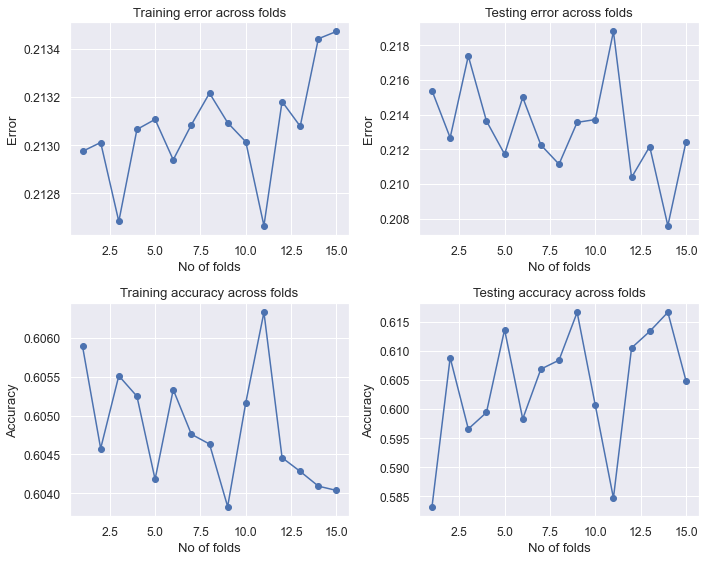

In [231]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Training error across folds')

plt.subplot(2,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Testing error across folds')

plt.subplot(2,2,3)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_R2_Score).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Training accuracy across folds')

plt.subplot(2,2,4)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_R2_Score).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')
plt.tight_layout()

# 21. Random Forest

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
rfr=RandomForestRegressor()

In [234]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=90)

In [235]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

## 21.1 Evaluation Matrix

In [236]:
pred_test=rfr.predict(x_test)

In [237]:
MAE=mean_absolute_error(y_test,pred_test)

In [238]:
MAE

0.035851779934259156

In [239]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [240]:
RMSE

0.2729779390792992

In [241]:
rfr_score=r2_score(y_test,pred_test)

In [242]:
rfr_score

0.9618137704023623

## 21.2 Choosing Best CV

In [670]:
for j in range(2,15):
    rfr_score=cross_val_score(rfr,x_train,y_train,cv=j)
    rfr_s=rfr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",rfr_score*100)
    print("R2_score:",rfr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [94.69457143 95.00823722]
R2_score: 94.85140432736445


AT CV :- 3
Cross Validation score is: [95.3376005  95.40779668 95.635832  ]
R2_score: 95.46040972728017


AT CV :- 4
Cross Validation score is: [95.53803334 95.75099965 95.89065262 95.86610918]
R2_score: 95.76144869708048


AT CV :- 5
Cross Validation score is: [95.64447402 95.56179202 96.11450069 95.94964827 96.038313  ]
R2_score: 95.86174559854973


AT CV :- 6
Cross Validation score is: [95.75329014 95.67814808 95.84759481 96.04598609 96.1963999  96.0760771 ]
R2_score: 95.93291601848962


AT CV :- 7
Cross Validation score is: [95.81735182 95.87402444 95.59064193 96.31403075 95.89910939 96.31726234
 96.02520518]
R2_score: 95.97680369339463


AT CV :- 8
Cross Validation score is: [95.86306172 95.58934145 95.99901105 96.0169924  96.0165607  96.26941183
 96.19690861 95.97372179]
R2_score: 95.99062619395313


AT CV :- 9
Cross Validation score is: [95.78718587 95.67959331 95.92219123 95.63139297 9

In [243]:
cross_val_score(rfr,x_train,y_train,cv=13)

array([0.95808713, 0.95935471, 0.95515459, 0.96084872, 0.95911624,
       0.96004451, 0.96736593, 0.96062657, 0.96299282, 0.96581537,
       0.9615739 , 0.96560008, 0.95745521])

In [244]:
rfr_cv_score=cross_val_score(rfr,x_train,y_train,cv=13).mean()

In [245]:
rfr_score=r2_score(y_test,pred_test)

In [246]:
rfr_score

0.9618137704023623

In [247]:
rfr_MAE=MAE

In [248]:
rfr_MAE

0.035851779934259156

## 21.3  Checking for Overfitting or Underfitting for model

In [249]:
kf = KFold(n_splits=15,shuffle=True) 
training_error = []
training_R2_Score = []
testing_error = []
testing_R2_Score = []
for train_index,test_index in kf.split(x_scaled): 
    x_train,x_test = x_scaled[train_index],x_scaled[test_index]
    y_train,y_test = y[train_index],y[test_index]
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    train_data_pred = rfr.predict(x_train)
    test_data_pred = rfr.predict(x_test)
    training_error.append(mean_absolute_error(y_train,train_data_pred))
    testing_error.append(mean_absolute_error(y_test,test_data_pred))
    training_R2_Score.append(r2_score(y_train,train_data_pred))
    testing_R2_Score.append(r2_score(y_test,test_data_pred))

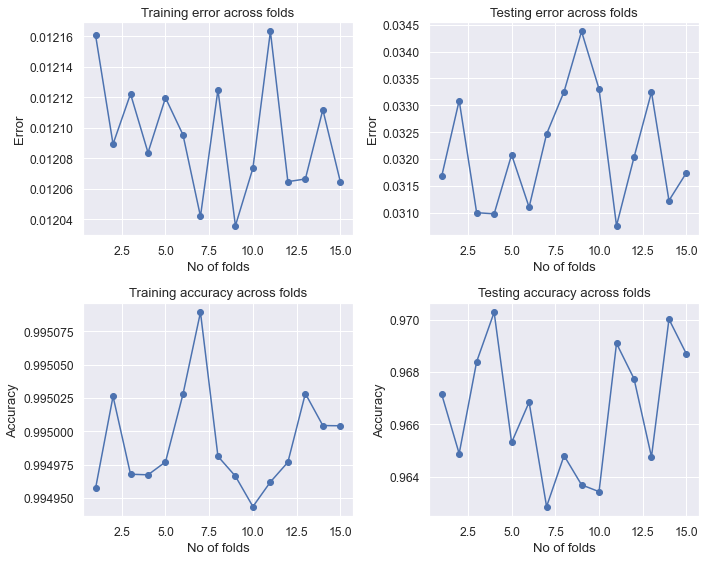

In [250]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Training error across folds')

plt.subplot(2,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Testing error across folds')

plt.subplot(2,2,3)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_R2_Score).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Training accuracy across folds')

plt.subplot(2,2,4)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_R2_Score).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')
plt.tight_layout()

# 22. Decision Tree

In [302]:
from sklearn.tree import DecisionTreeRegressor

In [303]:
dtr=DecisionTreeRegressor()

In [304]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=90)

In [305]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

## 22.1 Evaluation Matrix

In [306]:
pred_test=dtr.predict(x_test)

In [307]:
MAE=mean_absolute_error(y_test,pred_test)

In [308]:
MAE

0.036626389490068974

In [309]:
RMSE=np.sqrt(mean_squared_error(y_test,pred_test))

In [310]:
RMSE

0.11180667504147716

In [311]:
dtr_score=r2_score(y_test,pred_test)

In [312]:
dtr_score

0.9336929690471606

In [313]:
dtr_MAE=mean_absolute_error(y_test,pred_test)

In [314]:
dtr_MAE

0.036626389490068974

## 22. 2 Choosing Best CV and score

In [315]:
for j in range(2,15):
    dtr_score=cross_val_score(dtr,x_train,y_train,cv=j)
    dtr_s=dtr_score.mean()
    print("AT CV :-",j)
    print("CV Score:",dtr_s*100)
    print("\n")

AT CV :- 2
CV Score: 90.30805981918462


AT CV :- 3
CV Score: 92.25013666491418


AT CV :- 4
CV Score: 92.44924226871719


AT CV :- 5
CV Score: 92.30661940908641


AT CV :- 6
CV Score: 92.76980679296852


AT CV :- 7
CV Score: 92.78421452119395


AT CV :- 8
CV Score: 92.68911087795098


AT CV :- 9
CV Score: 92.9431793969545


AT CV :- 10
CV Score: 93.02660295448109


AT CV :- 11
CV Score: 93.06982504389593


AT CV :- 12
CV Score: 93.0996107158509


AT CV :- 13
CV Score: 93.15768652310578


AT CV :- 14
CV Score: 93.15973248951522




In [319]:
cross_val_score(dtr,x_train,y_train,cv=13)

array([0.92855815, 0.93500076, 0.92085902, 0.93740263, 0.93275682,
       0.93165215, 0.93450381, 0.92755831, 0.93100282, 0.93253804,
       0.93075746, 0.938003  , 0.92489047])

In [320]:
dtr_cv_score=cross_val_score(dtr,x_train,y_train,cv=13).mean()

In [321]:
dtr_cv_score

0.9309111107516455

In [322]:
dtr_score=r2_score(y_test,pred_test)

In [323]:
dtr_score

0.9336929690471606

## 22.3 Checking for Overfitting or Underfitting for model

In [269]:
kf = KFold(n_splits=15,shuffle=True) 
training_error = []
training_R2_Score = []
testing_error = []
testing_R2_Score = []
for train_index,test_index in kf.split(x_scaled): 
    x_train,x_test = x_scaled[train_index],x_scaled[test_index]
    y_train,y_test = y[train_index],y[test_index]
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    train_data_pred = dtr.predict(x_train)
    test_data_pred = dtr.predict(x_test)
    training_error.append(mean_absolute_error(y_train,train_data_pred))
    testing_error.append(mean_absolute_error(y_test,test_data_pred))
    training_R2_Score.append(r2_score(y_train,train_data_pred))
    testing_R2_Score.append(r2_score(y_test,test_data_pred))

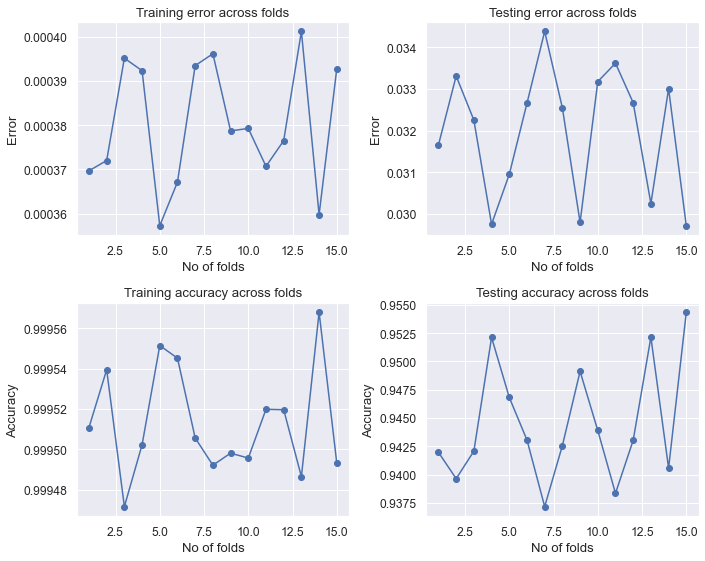

In [270]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Training error across folds')

plt.subplot(2,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Testing error across folds')

plt.subplot(2,2,3)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_R2_Score).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Training accuracy across folds')

plt.subplot(2,2,4)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_R2_Score).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')
plt.tight_layout()

# 23. Gradient Boosting Regressor

In [271]:
from sklearn.ensemble import GradientBoostingRegressor

In [272]:
gbr=GradientBoostingRegressor()

In [273]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=90)

In [274]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

## 23.1 Evluation Matrix

In [275]:
pred_test=gbr.predict(x_test)

In [276]:
MAE=mean_absolute_error(y_test,pred_test)

In [277]:
MAE

0.11215975225822136

In [278]:
RMSE=np.sqrt(mean_squared_error(y_test,pred_test))

In [279]:
RMSE

0.16255358725308577

In [280]:
gbr_score=r2_score(y_test,pred_test)

In [281]:
gbr_score

0.859842212563007

In [282]:
gbr_MAE=mean_absolute_error(y_test,pred_test)

In [283]:
gbr_MAE

0.11215975225822136

## 23.2 Choosing Best CV and score

In [716]:
for j in range(2,15):
    gbr_score=cross_val_score(gbr,x_train,y_train,cv=j)
    gbr_s=gbr_score.mean()
    print("AT CV :-",j)
    print("CV Score:",gbr_s*100)
    print("\n")

AT CV :- 2
CV Score: 86.15478854864395


AT CV :- 3
CV Score: 86.19699546091036


AT CV :- 4
CV Score: 86.27588396755917


AT CV :- 5
CV Score: 86.1941697298297


AT CV :- 6
CV Score: 86.25376429902639


AT CV :- 7
CV Score: 86.16564400820008


AT CV :- 8
CV Score: 86.17389465436756


AT CV :- 9
CV Score: 86.25902215550654


AT CV :- 10
CV Score: 86.2094170523279


AT CV :- 11
CV Score: 86.23214595584365


AT CV :- 12
CV Score: 86.21035378270777


AT CV :- 13
CV Score: 86.2958653355333


AT CV :- 14
CV Score: 86.22103067282653




In [284]:
cross_val_score(gbr,x_train,y_train,cv=13)

array([0.86147674, 0.86773119, 0.84721999, 0.86529871, 0.8595492 ,
       0.86322857, 0.86095674, 0.86913707, 0.86541443, 0.87018532,
       0.86280433, 0.86591242, 0.85951526])

In [285]:
gbr_cv_score=cross_val_score(gbr,x_train,y_train,cv=13).mean()

In [286]:
gbr_cv_score

0.8629561528838126

In [287]:
gbr_score=r2_score(y_test,pred_test)

In [288]:
gbr_score

0.859842212563007

## 23.3 Checking for Overfitting or Underfitting for model

In [289]:
kf = KFold(n_splits=15,shuffle=True) 
training_error = []
training_R2_Score = []
testing_error = []
testing_R2_Score = []
for train_index,test_index in kf.split(x_scaled): 
    x_train,x_test = x_scaled[train_index],x_scaled[test_index]
    y_train,y_test = y[train_index],y[test_index]
    gbr =GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    train_data_pred = gbr.predict(x_train)
    test_data_pred = gbr.predict(x_test)
    training_error.append(mean_absolute_error(y_train,train_data_pred))
    testing_error.append(mean_absolute_error(y_test,test_data_pred))
    training_R2_Score.append(r2_score(y_train,train_data_pred))
    testing_R2_Score.append(r2_score(y_test,test_data_pred))

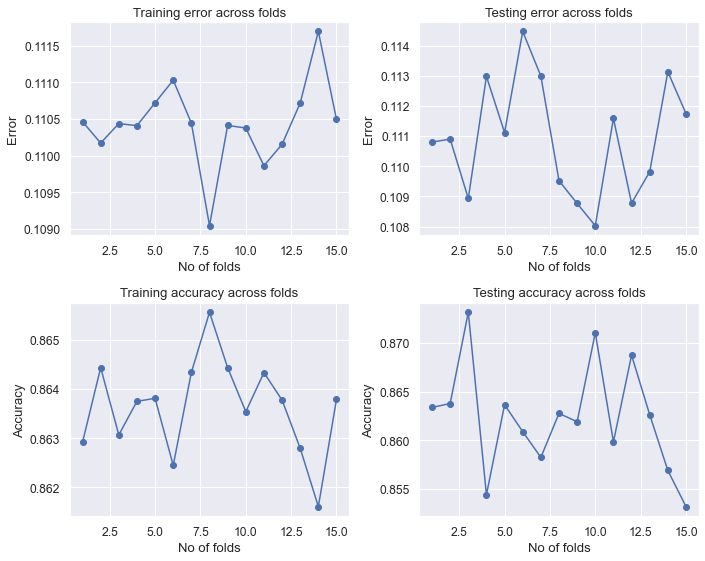

In [290]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Training error across folds')

plt.subplot(2,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Testing error across folds')

plt.subplot(2,2,3)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_R2_Score).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Training accuracy across folds')

plt.subplot(2,2,4)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_R2_Score).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')
plt.tight_layout()

# 24. Choosing the Best Model

In [324]:
mlr_score=round(mlr_score,2)
rfr_score=round(rfr_score,2)
dtr_score=round(dtr_score,2)
gbr_score=round(gbr_score,2)


In [325]:
mlr_cv_score=round(mlr_cv_score,2)
rfr_cv_score=round(rfr_cv_score,2)
dtr_cv_score=round(dtr_cv_score,2)
gbr_cv_score=round(gbr_cv_score,2)

In [326]:
Linear_Regression={"R2 Score":(mlr_score,2),
                    "CV Score":(mlr_cv_score,2),
                    "Difference":mlr_score-mlr_cv_score,
                    "MAE":mlr_MAE}

Random_Forest_Regression={"R2 Score":(rfr_score,2),
                    "CV Score":(rfr_cv_score,2),
                    "Difference":rfr_score-rfr_cv_score,
                 "MAE":rfr_MAE}
Decision_Tree_Regressor={"R2 Score":(dtr_score,2),
                    "CV Score":(dtr_cv_score,2),
                    "Difference":dtr_score-dtr_cv_score,
                 "MAE":dtr_MAE}
GradientBoosting_Regressor={"R2 Score":(gbr_score,2),
                    "CV Score":(gbr_cv_score,2),
                    "Difference":gbr_score-gbr_cv_score,
                 "MAE":gbr_MAE}

In [327]:
data=np.array([[mlr_score,mlr_cv_score,mlr_score-mlr_cv_score,mlr_MAE],[rfr_score,rfr_cv_score,rfr_score-rfr_cv_score,rfr_MAE],[dtr_score,dtr_cv_score,dtr_score-dtr_cv_score,dtr_MAE],[gbr_score,gbr_cv_score,gbr_score-gbr_cv_score,gbr_MAE]])

In [328]:
index_value=["Linear_Regression","Random_Forest_Regression","Decision_Tree_Regressor","GradientBoosting_Regressor"]

In [329]:
columns_value=["R2 Score","Cross Validation Score","Difference","MAE"]

In [330]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [331]:
model_selection

,R2 Score,Cross Validation Score,Difference,MAE
Linear_Regression,0.60,0.60,0.0,0.213570
Random_Forest_Regression,0.96,0.96,0.0,0.035852
Decision_Tree_Regressor,0.93,0.93,0.0,0.036626
GradientBoosting_Regressor,0.86,0.86,0.0,0.112160


**As we can see that Random Forest Regression is performing better compared to other details.**

# 25. Hypertuning Random Forest Regression

In [336]:
from sklearn.model_selection import GridSearchCV

In [337]:
grid_param={
    "n_estimators":[50,100],
    "min_samples_split":[1,2,6],
    "min_samples_leaf":[1,2,4,]
}

In [338]:
grd=GridSearchCV(rfr,param_grid=grid_param)

In [339]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 6],
                         'n_estimators': [50, 100]})

In [340]:
grd.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [341]:
rfr=grd.best_estimator_

In [342]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [343]:
y_pred=rfr.predict(x_test)

In [344]:
r2_score(y_test,y_pred)

0.961885328905925

**As we can see after hypertuning slightly model performace has imporved.**

# 26. Saving the model

In [505]:
import pickle
filename="Airline_fare_prediction.pkl"
pickle.dump(rfr,open(filename,"wb"))

# 27. DATA ANALYSIS

## 27.1 Which Airline Services Avg Price of Fare is expensive?

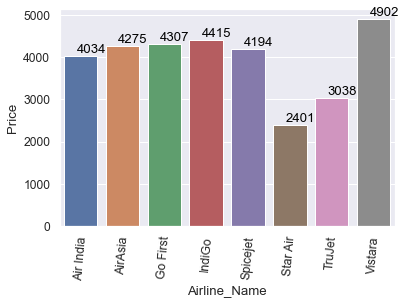

In [485]:
grouped=data.groupby(data["Airline_Name"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")  

## 27.2 Which Airline having Maximum number of flight running domestically?

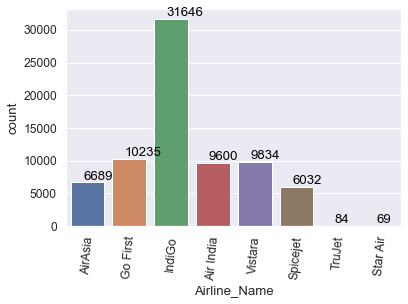

In [486]:
s=sns.countplot(data["Airline_Name"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black") 

## 27.3 Which time the customer travelling more and less in flight?

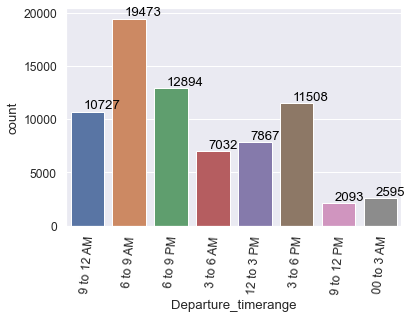

In [487]:
s=sns.countplot(data["Departure_timerange"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

## 27.4 From Which City the maximum flights are running?

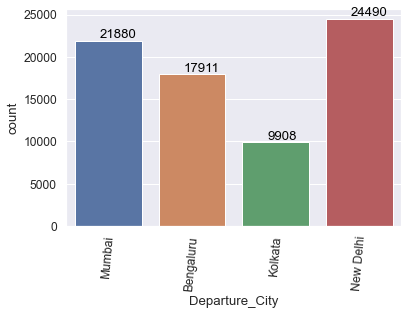

In [488]:
s=sns.countplot(data["Departure_City"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

## 27.5 Stoppage details of domestic Airlines Serivecs 

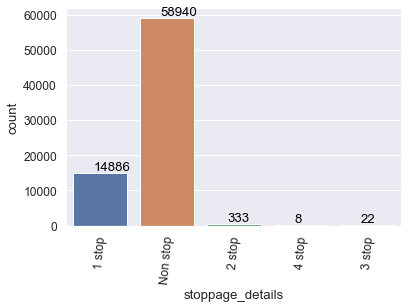

In [489]:
s=sns.countplot(data["stoppage_details"])
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

## 27.6 When Customer should booked flight ticket to get cheapset fare?

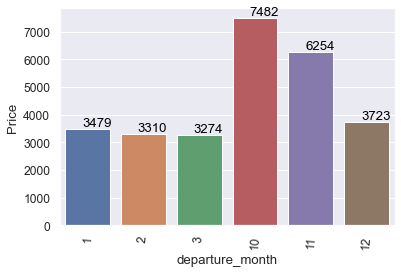

In [490]:
grouped=data.groupby(data["departure_month"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

## 27.7 Which day Airlines ticket are cheaper than other days in week?

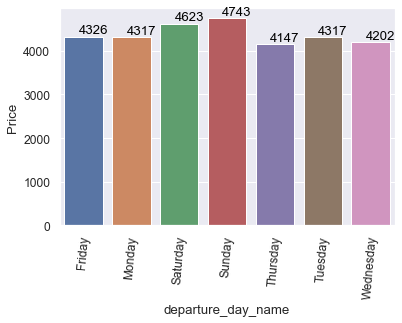

In [497]:
grouped=data.groupby(data["departure_day_name"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")  

## 27.8 Which City Airlines ticket are most expensive?

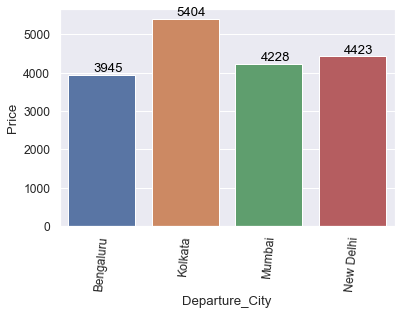

In [498]:
grouped=data.groupby(data["Departure_City"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

## 27.9 How the stoppages impact on Airlines fare?

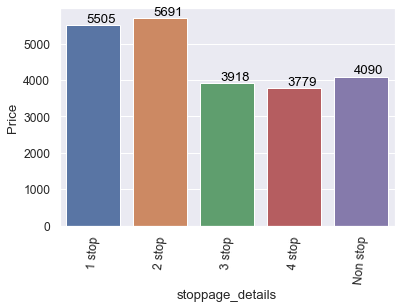

In [491]:
grouped=data.groupby(data["stoppage_details"])
s=grouped.mean()
s=sns.barplot(x=s.index,y="Price",data=s)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

## 27.10 How many stoppages Airlines company haivng for thier flight?

<AxesSubplot:xlabel='Airline_Name', ylabel='stoppage_details'>

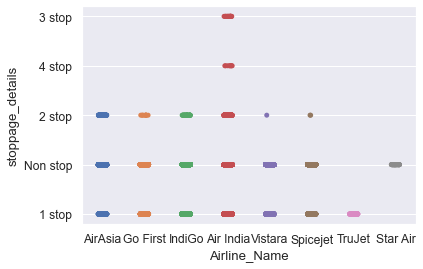

In [499]:
sns.stripplot(x=data["Airline_Name"],y=data["stoppage_details"])

## 27.11 Which Airline and which day in week the flight fare is cheaper or expensive?

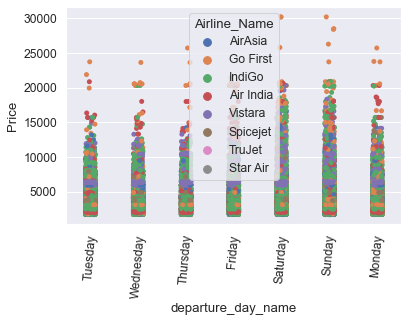

In [504]:
s=sns.stripplot(x=data["departure_day_name"],y=data["Price"],data=data,hue="Airline_Name",jitter=True)
s.set_xticklabels(s.get_xticklabels(),rotation=85);